# Chronic Kidney Disease
### Data Spaces (01RLPOV) - Politecnico di Torino A.Y. 2019/2020

##### Prof. Francesco Vaccarino 
##### Student Pietro Basci (s266004)

# 1. Introduction

The objective of this work is to build a classier that, starting from a set of measurements, is able to detect if a patient is affected by the Chronic Kidney Disease. Chronic kidney disease is a type of kidney disease in which there is gradual loss of kidney function over a period of months to years. Initially there are generally no symptoms; later, symptoms may include leg swelling, feeling tired, vomiting, loss of appetite, and confusion. Complications include an increased risk of heart disease, high blood pressure, bone disease and anemia.

In order to do that, we will start in analyzing the Chronic_Kidney_Disease DataSet available on UCI Machine Learning Repository and then, after knowing better the data, we will analyze the behavior of few classifiers in order to find the best performing on our data. All analysis will be done using Python and the complete code can be found in this Jupyter Notebook. 

# 2. Dataset

The dataset considered is the Chronic_Kidney_Disease DataSet available on UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease). It was created by L.Jerlin Rubini (Research Scholar), Alagappa University, India, in collaboration with Dr. P. Soundara Pandian (Senior Consultant Nephrologist), Apollo Hospitals, India.

The dataset was collected over a period of 2 month from Apollo Hospitals and consists of 400 instances and 25 attributes (11 numeric and 14 nominal) including the target class which can assume two values: Positive or Negative.

*NUMERICAL ATTRIBUTE*:
- age --  Age (numerical): age in years
- bp  -- Blood Pressure (numerical): bp in mm/Hg
- bgr  -- Blood Glucose Random (numerical): bgr in mgs/dl
- bu  --  Blood Urea (numerical): bu in mgs/dl
- sc  --  Serum Creatinine (numerical): sc in mgs/dl
- sod  --  Sodium (numerical): sod in mEq/L 
- pot  --  Potassium (numerical): pot in mEq/L 
- hemo  --  Hemoglobin (numerical): hemo in gms 
- pcv  --  Packed Cell Volume (numerical)
- wbcc  --  White Blood Cell Count(numerical): wbcc in cells/cumm
- rbcc  --  Red Blood Cell Count(numerical): rbcc in millions/cmm

*NOMINAL ATTRIBUTE*:
- sg  --  Specific Gravity (nominal): sg - (1.005, 1.010, 1.015, 1.020, 1.025)
- al  --  Albumin (nominal): al - (0, 1, 2, 3, 4, 5)
- su  --  Sugar (nominal): su - (0, 1, 2, 3, 4, 5)
- rbc  --  Red Blood Cells (nominal): rbc - (normal, abnormal)
- pc  --  Pus Cell (nominal): pc - (normal, abnormal)
- pcc  --  Pus Cell clumps (nominal): pcc - (present, notpresent) 
- ba  --  Bacteria (nominal): ba - (present, notpresent) 
- htn  --  Hypertension (nominal): htn - (yes, no) 
- dm  --  Diabetes Mellitus (nominal): dm - (yes, no)
- cad  --  Coronary Artery Disease (nominal): cad - (yes, no)
- appet  --  Appetite (nominal): appet - (good, poor)
- pe  --  Pedal Edema (nominal): pe - (yes, no)
- ane  --  Anemia(nominal): ane - (yes, no)
- class  --  Class (nominal): class - (ckd, notckd)


# 3. Exploratory Data Analysis

As first step we import some of the most popular library needed for the following analysis.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To silence some harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Set a random seed in order to make the experiment repeatable
random_state = 25
np.random.seed(random_state)

The original dataset was provided in arff format which is a kind of file format used by the Weka software. A typical characteristic of this file is that missing values are represented with the '?' character. So, it has been added to the list of symbols used by Pandas to recognize NaN values.  
After loading the data, the some initial rows are showed to quickly test if data was correctly loaded.

In [56]:
# Make a list of missing value types
missing_values = ["n/a", "na", "--", "?", -1]

# Read the CSV file
df = pd.read_csv('Chronic_Kidney_Disease/chronic_kidney_disease.csv', na_values = missing_values)
df.head()

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane class  
0  121.0  ...  44.0  7800.0   5.2  yes  yes   no   good   no   no   ckd  
1    NaN  ...  38.0  6000.0   NaN   no   no   no   good   no   no   ckd  
2  423.0  ...  31.0  7500.0   NaN   no  yes   no   poor   no  yes   ckd  
3  117.0  ...  32.0  6700.0   3.9  yes   no   no   poor  yes  yes   ckd  
4  106.0  ...  35.0  7300.0   4.6   no   no   no   good   no   no   ckd  

[5 rows x 25 columns]

Some of the categorical attribute contains numbers so Pandas automatically infers the types of these attributes as 'numerical'. To avoid this, we can cast to 'category' these attribute types.

In [57]:
# Cast to category the following attribute
df = df.astype({'sg': 'category',
                'al': 'category',
                'su': 'category',
                'rbc': 'category',
                'pc': 'category',
                'pcc': 'category',
                'ba': 'category',
                'htn': 'category',
                'dm': 'category',
                'cad': 'category',
                'appet': 'category',
                'pe': 'category',
                'ane': 'category',
                'class': 'category'
               })

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      391 non-null float64
bp       388 non-null float64
sg       353 non-null category
al       354 non-null category
su       351 non-null category
rbc      248 non-null category
pc       335 non-null category
pcc      396 non-null category
ba       396 non-null category
bgr      356 non-null float64
bu       381 non-null float64
sc       383 non-null float64
sod      313 non-null float64
pot      312 non-null float64
hemo     348 non-null float64
pcv      329 non-null float64
wbcc     294 non-null float64
rbcc     269 non-null float64
htn      398 non-null category
dm       398 non-null category
cad      398 non-null category
appet    399 non-null category
pe       399 non-null category
ane      399 non-null category
class    400 non-null category
dtypes: category(14), float64(11)
memory usage: 41.6 KB


From these information we can see that our dataset is composed by 400 entries and 25 columns of which 14 are Categorical and 11 are Numerical. At the same time, we can also notice the conspicuous presence of missing values. This aspect will be further analyzed in section 3.4.

## 3.1 Descriptive Statistics

As first analysis, the following command is used to obtain some interesting statistics for numerical features. These measures are particularly useful to understand the central tendency of our data.

The function returns for each feature: 
- the count of the non-null values
- the mean
- the standard deviation
- the minimal value 
- 1st quartile
- 2nd quartile (median)
- 3rd quartile
- the maximal value

In [58]:
df.describe()

age          bp         bgr          bu          sc         sod  \
count  391.000000  388.000000  356.000000  381.000000  383.000000  313.000000   
mean    51.483376   76.469072  148.036517   57.425722    3.072454  137.528754   
std     17.169714   13.683637   79.281714   50.503006    5.741126   10.408752   
min      2.000000   50.000000   22.000000    1.500000    0.400000    4.500000   
25%     42.000000   70.000000   99.000000   27.000000    0.900000  135.000000   
50%     55.000000   80.000000  121.000000   42.000000    1.300000  138.000000   
75%     64.500000   80.000000  163.000000   66.000000    2.800000  142.000000   
max     90.000000  180.000000  490.000000  391.000000   76.000000  163.000000   

              pot        hemo         pcv          wbcc        rbcc  
count  312.000000  348.000000  329.000000    294.000000  269.000000  
mean     4.627244   12.526437   38.884498   8406.122449    4.707435  
std      3.193904    2.912587    8.990105   2944.474190    1.025323  
min      2.500000    3.100000    9.000000   2200.000000    2.100000  
25%      3.800000   10.300000   32.000000   6500.000000    3.900000  
50%      4.400000   12.650000   40.000000   8000.000000    4.800000  
75%      4.900000   15.000000   45.000000   9800.000000    5.400000  
max     47.000000   17.800000   54.000000  26400.000000    8.000000

Then, the same command is used for the categorical feature. 

In this case it returns: 
- the count of the non-null values
- the number of distinct values for that attribute
- the most common value (mode)
- the most common value’s frequency

In [59]:
df.describe(exclude=[np.number])

sg     al     su     rbc      pc         pcc          ba  htn  \
count   353.00  354.0  351.0     248     335         396         396  398   
unique    5.00    6.0    6.0       2       2           2           2    2   
top       1.02    0.0    0.0  normal  normal  notpresent  notpresent   no   
freq    106.00  199.0  290.0     201     259         354         374  251   

         dm  cad appet   pe  ane class  
count   398  398   399  399  399   400  
unique    2    2     2    2    2     2  
top      no   no  good   no   no   ckd  
freq    261  364   317  323  339   250

Finally, the distribution of class has been analyzed in order to detect any unbalance among classes.

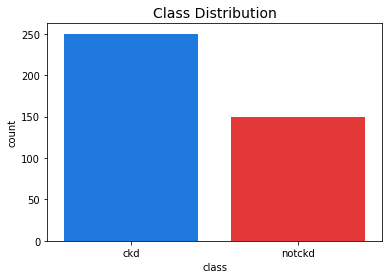

In [60]:
colors = ["#0077ff", "#ff1c1c"]

sns.countplot('class', data=df, palette=colors)
plt.title('Class Distribution', fontsize=14)
plt.show()

As we can see, there is no relevant unbalance in our data:

- 250 CKD samples (62,5%)
- 150 NOTCKD samples (37,5%)

## 2.2 Outliers Analysis

The next step is the analysis of outliers. The quicker way to locate outliers inside a distribution is by using boxplots. A boxplot is a kind of graphical representation of data distribution that gives a good indication of how the values in the data are spread out. It is based on five values: “minimum”, first quartile (Q1), median (Q2), third quartile (Q3), and “maximum”. The graph is composed by a box whose height is equal to Q3-Q1 (IQR) and two whiskers whose length are given by “minimum” and “maximum” that are respectively given by  the minimum value if it is greater than Q1 - 1,5IQR otherwise the smallest value greater than Q1 - 1,5IQR, and similarly the maximum value if it is lower than Q3 + 1,5IQR otherwise the greatest value lower than Q3 + 1,5IQR.

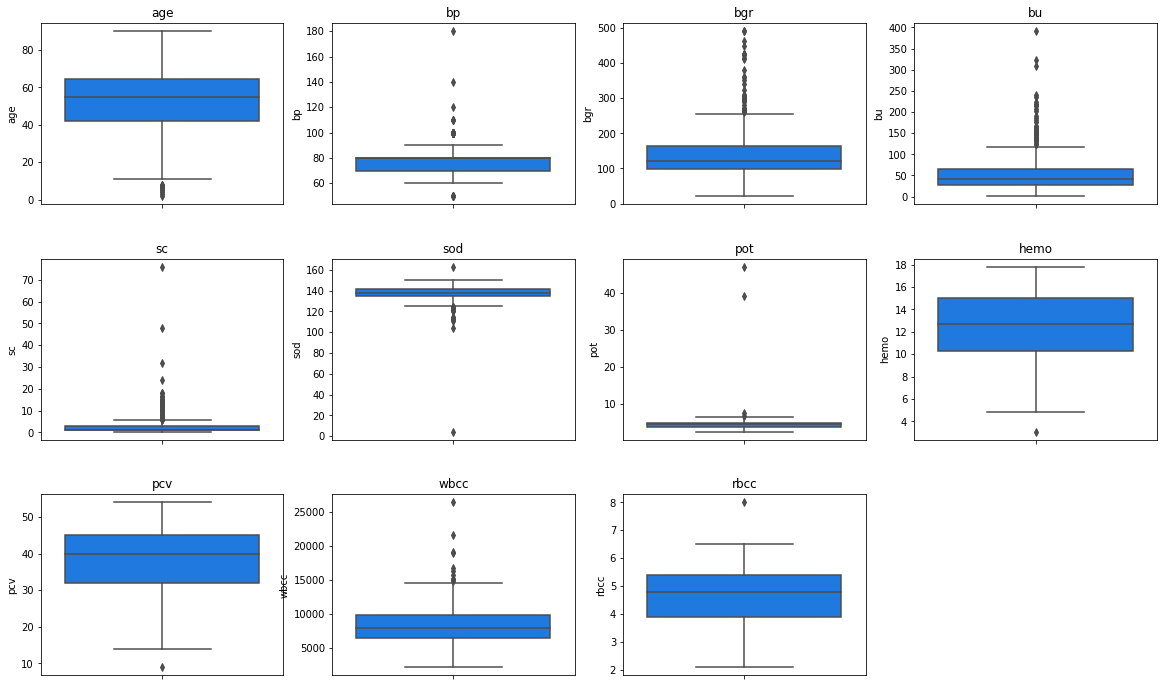

In [61]:
f, axes = plt.subplots(ncols=4, nrows=3, figsize=(20,12))
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)

for axe, column in zip(axes.flatten(), df.select_dtypes('number').columns):
    sns.boxplot(y=column, data=df, palette=colors, ax=axe, whis=1.5)
    axe.set_title('{}'.format(column))

axes[2][3].remove()
plt.show()

As we can see, there are some data point that are very far from the other such as in the case of Sodium and Potassium. The normal ranges of Sodium and Potassium for instance are 135-145 mEq/L and 3.5-5.0 mEq/L respectively. But looking at boxplot we can see the presence of value near to 0 mEq/L in the case of Sodium and values greater than 40 mEq/L which are extremely far from typical values and so it is likely that these values are affected by errors. 

However there are also outliers that are closer to the rest of the data, are possible values and cannot be considered wrong. So, I decided to remove only 'extreme outliers', namely values that are more than 3\*IQR below the 1st quartile or above the 3rd quartile. 

        x < Q1 - 3*IQR    or    x > Q3 + 3*IQR

In [62]:
def remove_outlier(df_in, col_name, thr):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-thr*iqr
    fence_high = q3+thr*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high) | df_in[col_name].isnull()]
    return df_out

# For each attribute, remove outliers using a threshold of 3
for column in df.select_dtypes('number').columns:
    df = remove_outlier(df, column, 3)

After that extreme outliers have been removed, we check the status of our dataset.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 399
Data columns (total 25 columns):
age      336 non-null float64
bp       335 non-null float64
sg       309 non-null category
al       310 non-null category
su       307 non-null category
rbc      214 non-null category
pc       292 non-null category
pcc      341 non-null category
ba       341 non-null category
bgr      307 non-null float64
bu       328 non-null float64
sc       329 non-null float64
sod      269 non-null float64
pot      269 non-null float64
hemo     302 non-null float64
pcv      285 non-null float64
wbcc     253 non-null float64
rbcc     228 non-null float64
htn      343 non-null category
dm       343 non-null category
cad      343 non-null category
appet    344 non-null category
pe       344 non-null category
ane      344 non-null category
class    345 non-null category
dtypes: category(14), float64(11)
memory usage: 38.7 KB


We lost 55 entries, but we still have a lot of data.

Then, we check the variations of boxplots.

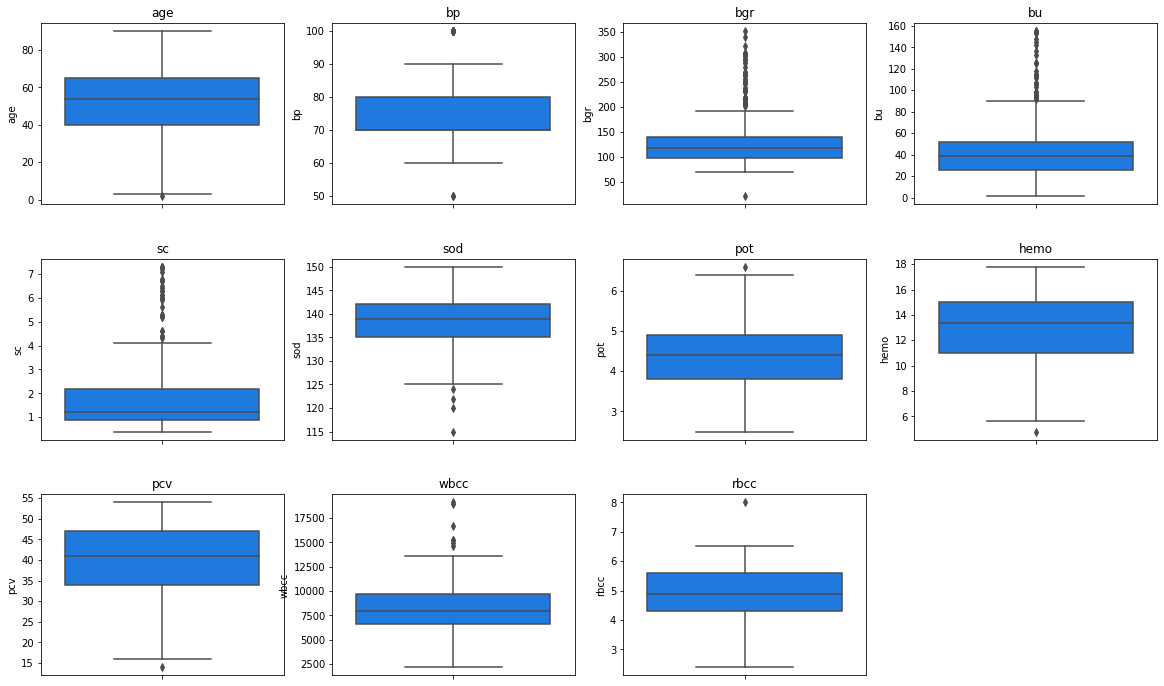

In [64]:
f, axes = plt.subplots(ncols=4, nrows=3, figsize=(20,12))
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)

for axe, column in zip(axes.flatten(), df.select_dtypes('number').columns):
    sns.boxplot(y=column, data=df, palette=colors, ax=axe, whis=1.5)
    axe.set_title('{}'.format(column))

axes[2][3].remove()
plt.show()

After that, we take a look to boxplots divided by class. In this way we can see how the values of these attributes changes for each class. 

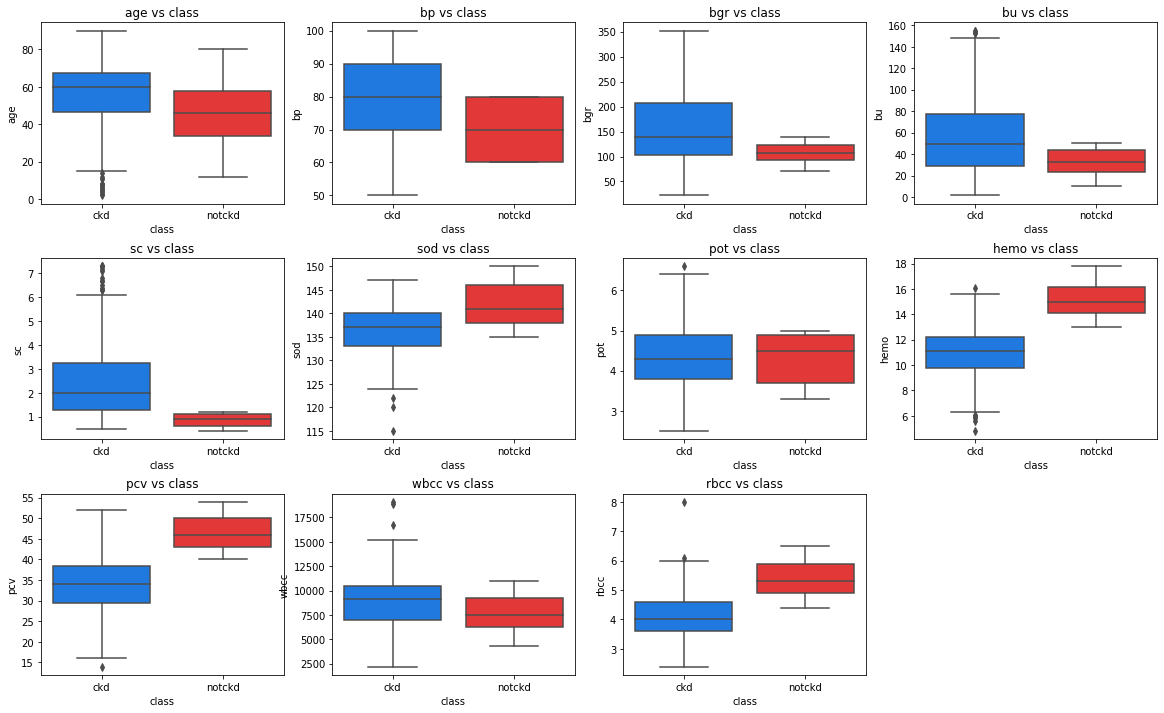

In [65]:
f, axes = plt.subplots(ncols=4, nrows=3, figsize=(20,12))
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)

for axe, column in zip(axes.flatten(), df.select_dtypes('number').columns):
    sns.boxplot(x="class", y=column, data=df, palette=colors, ax=axe, whis=1.5)
    axe.set_title('{} vs class'.format(column))

axes[2][3].remove()
plt.show()

Looking at these plots, we can expect that there is a negative correlation among *class* and some attribute such as *hemo*, *pcv* and *rbcc*. In fact, lower values of those attributes correspond to positive class (ckd, then referred as 1), while higher values correspond to negative class (notckd, then referred as 0). Similarly we can expect positive correlation among *class* and *sc*, while no correlation among *class* and *pot* as both distribution are almost aligned. Correlations will be further analyzed in section 3.5.

Finally, we check if there are wrong values in the categorical features.

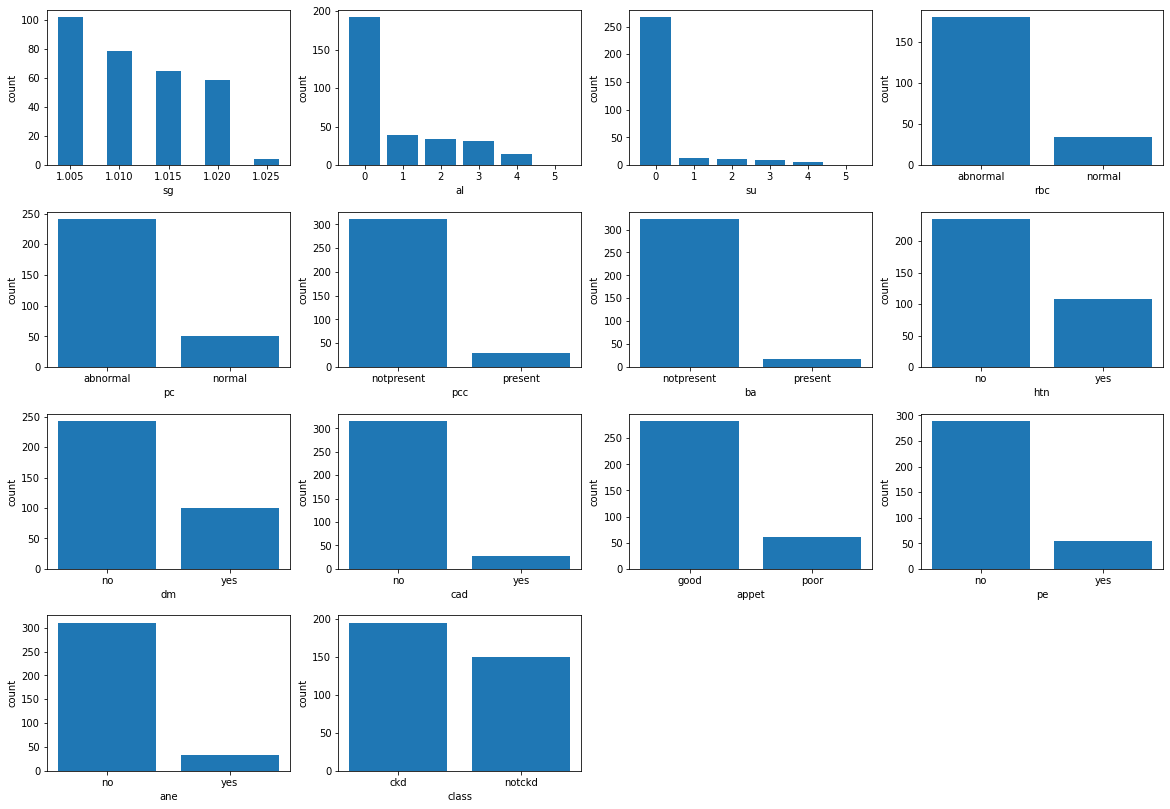


**Categorical features**

1.020    102
1.025     79
1.010     65
1.015     59
1.005      4
Name: sg, dtype: int64 

0.0    192
1.0     39
2.0     34
3.0     31
4.0     14
5.0      0
Name: al, dtype: int64 

0.0    267
2.0     13
1.0     11
3.0      9
4.0      6
5.0      1
Name: su, dtype: int64 

normal      180
abnormal     34
Name: rbc, dtype: int64 

normal      241
abnormal     51
Name: pc, dtype: int64 

notpresent    311
present        30
Name: pcc, dtype: int64 

notpresent    323
present        18
Name: ba, dtype: int64 

no     235
yes    108
Name: htn, dtype: int64 

no     243
yes    100
Name: dm, dtype: int64 

no     316
yes     27
Name: cad, dtype: int64 

good    283
poor     61
Name: appet, dtype: int64 

no     289
yes     55
Name: pe, dtype: int64 

no     310
yes     34
Name: ane, dtype: int64 

ckd       195
notckd    150
Name: class, dtype: int64 



In [66]:
f, axes = plt.subplots(ncols=4, nrows=4, figsize=(20,14))
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
w=0.0025

for ax, column in zip(axes.flatten(), df.select_dtypes('category').columns):
    ax.bar(df[column].value_counts().index.categories, df[column].value_counts().values, width=w)
    ax.set_xlabel(column)
    ax.set_ylabel('count')
    w=0.8

axes[3][2].remove()
axes[3][3].remove()
plt.show()

print('\n**Categorical features**\n')
for attribute in df.select_dtypes('category'):
    print(df[attribute].value_counts(), '\n')

All categorical features assume only values in the ranges specified in the dataset's description.

## 2.3 Categorical Data Encoding

Since we are going to use some techniques based on distances among data, we need to codify categorical data into numerical format. So, for some attributes such as sg, al and su, we can simply cast them to numerical as they already assume ordered numerical values. In the other cases, since predictors have only two possible values, we can simply replace each of them with a dummy variable that assumes two possible numerical values: 0 or 1.

In [67]:
# Cast 'sg', 'al' and 'su' attributes to numerical
df = df.astype({'sg': 'float64',
                'al': 'float64',
                'su': 'float64'
               })

# Define an association among old values and new numerical values for the other attributes
cleanup_nums = {"rbc":     {"normal": 0, "abnormal": 1},
                "pc":      {"normal": 0, "abnormal": 1},
                "pcc":     {"notpresent": 0, "present": 1},
                "ba":      {"notpresent": 0, "present": 1},
                "htn":     {"no": 0, "yes": 1},
                "dm":      {"no": 0, "yes": 1},
                "cad":     {"no": 0, "yes": 1},
                "appet":   {"poor": 0, "good": 1},
                "pe":      {"no": 0, "yes": 1},
                "ane":     {"no": 0, "yes": 1},
                "class":   {"notckd": 0, "ckd": 1}
               }
'''
cleanup_names = {"rbc":   "rbc_abnorm", 
                 "pc":    "pc_abnorm", 
                 "pcc":   "pcc_present",
                 "ba":    "ba_present",
                 "htn":   "htn_present",
                 "dm":    "dm_present",
                 "cad":   "cad_present",
                 "appet": "appet_poor",
                 "pe":    "pe_present",
                 "ane":   "ane_present"                
                }
'''
# Replace old values with those defined above
df.replace(cleanup_nums, inplace=True)
#df.rename(columns=cleanup_names, inplace=True)
df.head()

age     bp     sg   al   su  rbc   pc  pcc   ba    bgr  ...   pcv    wbcc  \
0  48.0   80.0  1.020  1.0  0.0  NaN  0.0  0.0  0.0  121.0  ...  44.0  7800.0   
1   7.0   50.0  1.020  4.0  0.0  NaN  0.0  0.0  0.0    NaN  ...  38.0  6000.0   
4  51.0   80.0  1.010  2.0  0.0  0.0  0.0  0.0  0.0  106.0  ...  35.0  7300.0   
5  60.0   90.0  1.015  3.0  0.0  NaN  NaN  0.0  0.0   74.0  ...  39.0  7800.0   
8  52.0  100.0  1.015  3.0  0.0  0.0  1.0  1.0  0.0  138.0  ...  33.0  9600.0   

   rbcc  htn   dm  cad  appet   pe  ane  class  
0   5.2  1.0  1.0  0.0    1.0  0.0  0.0      1  
1   NaN  0.0  0.0  0.0    1.0  0.0  0.0      1  
4   4.6  0.0  0.0  0.0    1.0  0.0  0.0      1  
5   4.4  1.0  1.0  0.0    1.0  1.0  0.0      1  
8   4.0  1.0  1.0  0.0    1.0  0.0  1.0      1  

[5 rows x 25 columns]

Let's check now if all attributes has been correctly transformed into numerical format.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 399
Data columns (total 25 columns):
age      336 non-null float64
bp       335 non-null float64
sg       309 non-null float64
al       310 non-null float64
su       307 non-null float64
rbc      214 non-null float64
pc       292 non-null float64
pcc      341 non-null float64
ba       341 non-null float64
bgr      307 non-null float64
bu       328 non-null float64
sc       329 non-null float64
sod      269 non-null float64
pot      269 non-null float64
hemo     302 non-null float64
pcv      285 non-null float64
wbcc     253 non-null float64
rbcc     228 non-null float64
htn      343 non-null float64
dm       343 non-null float64
cad      343 non-null float64
appet    344 non-null float64
pe       344 non-null float64
ane      344 non-null float64
class    345 non-null int64
dtypes: float64(24), int64(1)
memory usage: 70.1 KB


## 2.4 Missing Values Analysis

In this section we will address the problem of missing values. The dataset under consideration contains a significant number of missing values as confirmed by the following command. In the next steps, we will analyze how those values are distributed inside the dataset. Specifically, we will consider the number of NaN values per feature and then the number of NaN values per instance.

In [69]:
# Total number of missing values
df.isnull().sum().sum()

864

In the following graph the percentage of missing values per feature is considered. As we can see, the features with the largest number of missing values are *rbc* and *rbcc* with a percentage of about 38% and 34% of data. 

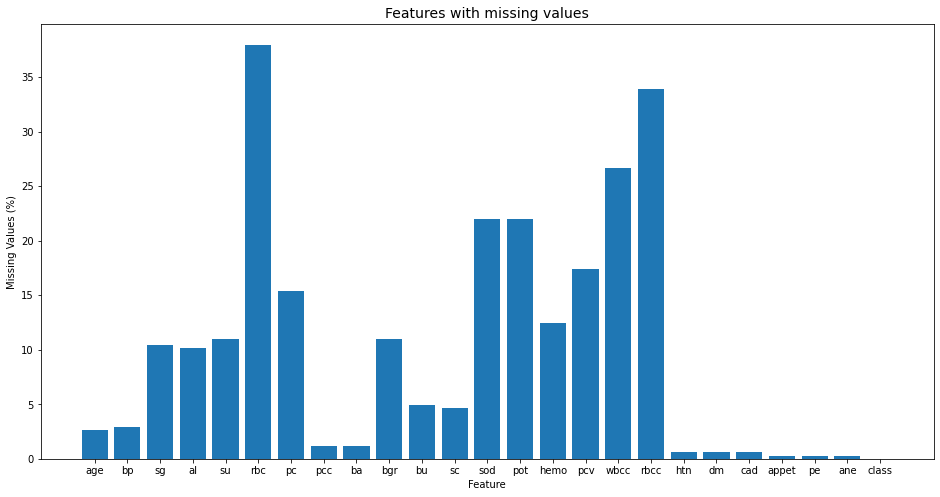


**Features with missing values**

age - missing values: 9  --  (2.61%)
bp - missing values: 10  --  (2.9%)
sg - missing values: 36  --  (10.43%)
al - missing values: 35  --  (10.14%)
su - missing values: 38  --  (11.01%)
rbc - missing values: 131  --  (37.97%)
pc - missing values: 53  --  (15.36%)
pcc - missing values: 4  --  (1.16%)
ba - missing values: 4  --  (1.16%)
bgr - missing values: 38  --  (11.01%)
bu - missing values: 17  --  (4.93%)
sc - missing values: 16  --  (4.64%)
sod - missing values: 76  --  (22.03%)
pot - missing values: 76  --  (22.03%)
hemo - missing values: 43  --  (12.46%)
pcv - missing values: 60  --  (17.39%)
wbcc - missing values: 92  --  (26.67%)
rbcc - missing values: 117  --  (33.91%)
htn - missing values: 2  --  (0.58%)
dm - missing values: 2  --  (0.58%)
cad - missing values: 2  --  (0.58%)
appet - missing values: 1  --  (0.29%)
pe - missing values: 1  --  (0.29%)
ane - missing values: 1  --  (0.29%)
class - missing values: 0  --  (0.0%)


In [70]:
missing_val_list = df.isnull().sum()

plt.figure(figsize=(16,8))
plt.bar(missing_val_list.index, np.divide(missing_val_list.values, len(df))*100)
plt.title('Features with missing values', fontsize=14)
plt.xlabel('Feature')
plt.ylabel('Missing Values (%)')
plt.show()

print('\n**Features with missing values**\n')
for k in missing_val_list.index:
    print('{} - missing values: {}  --  ({}%)'.format(k, missing_val_list[k], round(100*missing_val_list[k]/len(df), 2)))

Now, lets check the numer of missing values per instance. From the graph below we can see that about 40% of instances do not contain NaN values and there are some instances with even 10-11 NaN values.

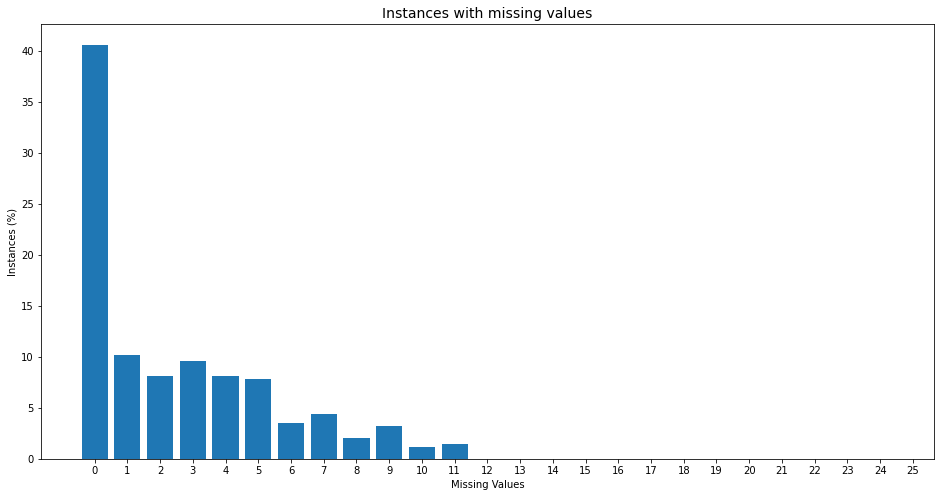


**Instances with missing values**

Instances with 0 missing values: 140  --  (40.58%)
Instances with 1 missing values: 35  --  (10.14%)
Instances with 2 missing values: 28  --  (8.12%)
Instances with 3 missing values: 33  --  (9.57%)
Instances with 4 missing values: 28  --  (8.12%)
Instances with 5 missing values: 27  --  (7.83%)
Instances with 6 missing values: 12  --  (3.48%)
Instances with 7 missing values: 15  --  (4.35%)
Instances with 8 missing values: 7  --  (2.03%)
Instances with 9 missing values: 11  --  (3.19%)
Instances with 10 missing values: 4  --  (1.16%)
Instances with 11 missing values: 5  --  (1.45%)
Instances with 12 missing values: 0  --  (0.0%)
Instances with 13 missing values: 0  --  (0.0%)
Instances with 14 missing values: 0  --  (0.0%)
Instances with 15 missing values: 0  --  (0.0%)
Instances with 16 missing values: 0  --  (0.0%)
Instances with 17 missing values: 0  --  (0.0%)
Instances with 18 missing values: 0  --  (0.0%)
Instances with 19 missing values: 0  -

In [71]:
num_miss_val= [0] * 25

for i in range(len(df)) :
    num = df.iloc[i].isnull().sum()
    num_miss_val[num] += 1

plt.figure(figsize=(16,8))
plt.bar(range(25), np.divide(num_miss_val, len(df))*100)
plt.title('Instances with missing values', fontsize=14)
plt.xlabel('Missing Values')
plt.ylabel('Instances (%)')
plt.xticks(np.arange(0, 26, 1.0))
plt.show()

print('\n**Instances with missing values**\n')
for i, n in enumerate(num_miss_val):
    print('Instances with {} missing values: {}  --  ({}%)'.format(i, n, round(100*n/len(df), 2)))

From this analysis we discover that only 40% of instances are complete, while 60% of data has one missing value at least. 

In order to not loose too much data and, at the same time, to not have the risk to intoduce too much distortion in our data, a thread-off has been found: ignore instances with more than 5 Nan values and replace missing values in the other cases. To choose values that will be used for the replacing, for each feature some values will be sampled from the real distribution of the data. The precess will be explained more in detail later.

So, as first step, we remove instances with more than 5 missing values.


In [72]:
# remove instances with more than 5 missing value
df_cln = df.dropna(thresh=20)
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 0 to 399
Data columns (total 25 columns):
age      288 non-null float64
bp       286 non-null float64
sg       283 non-null float64
al       283 non-null float64
su       283 non-null float64
rbc      207 non-null float64
pc       270 non-null float64
pcc      287 non-null float64
ba       287 non-null float64
bgr      269 non-null float64
bu       284 non-null float64
sc       286 non-null float64
sod      246 non-null float64
pot      246 non-null float64
hemo     270 non-null float64
pcv      265 non-null float64
wbcc     245 non-null float64
rbcc     225 non-null float64
htn      289 non-null float64
dm       289 non-null float64
cad      289 non-null float64
appet    290 non-null float64
pe       290 non-null float64
ane      290 non-null float64
class    291 non-null int64
dtypes: float64(24), int64(1)
memory usage: 59.1 KB


By doing that, we loose only 54 instances (13,5% of original data). 

After that, we check again missing values per feature to see if there are significant changes. The plot below shows a reduction of about 10% of NaN values for the features with the largest values.

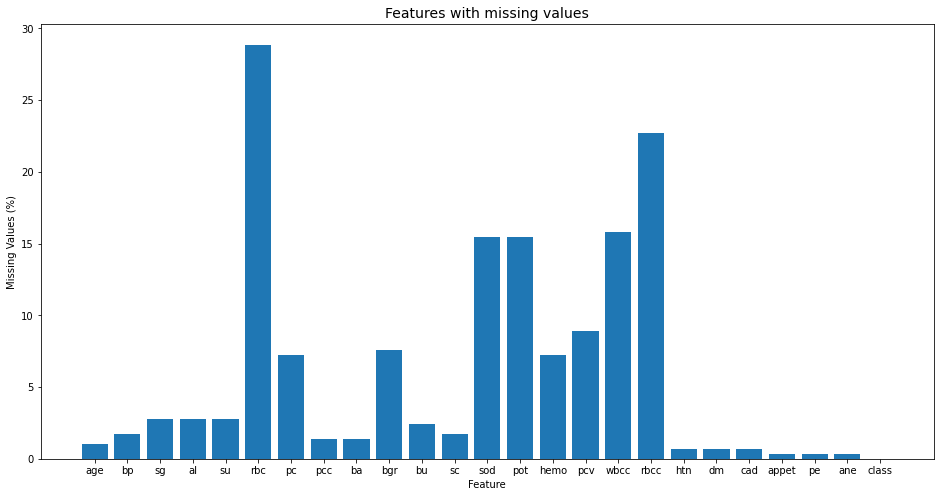


**Features with missing values**

age - missing values: 3  --  (1.03%)
bp - missing values: 5  --  (1.72%)
sg - missing values: 8  --  (2.75%)
al - missing values: 8  --  (2.75%)
su - missing values: 8  --  (2.75%)
rbc - missing values: 84  --  (28.87%)
pc - missing values: 21  --  (7.22%)
pcc - missing values: 4  --  (1.37%)
ba - missing values: 4  --  (1.37%)
bgr - missing values: 22  --  (7.56%)
bu - missing values: 7  --  (2.41%)
sc - missing values: 5  --  (1.72%)
sod - missing values: 45  --  (15.46%)
pot - missing values: 45  --  (15.46%)
hemo - missing values: 21  --  (7.22%)
pcv - missing values: 26  --  (8.93%)
wbcc - missing values: 46  --  (15.81%)
rbcc - missing values: 66  --  (22.68%)
htn - missing values: 2  --  (0.69%)
dm - missing values: 2  --  (0.69%)
cad - missing values: 2  --  (0.69%)
appet - missing values: 1  --  (0.34%)
pe - missing values: 1  --  (0.34%)
ane - missing values: 1  --  (0.34%)
class - missing values: 0  --  (0.0%)


In [73]:
missing_val_list = df_cln.isnull().sum()

plt.figure(figsize=(16,8))
plt.bar(missing_val_list.index, np.divide(missing_val_list.values, len(df_cln))*100)
plt.title('Features with missing values', fontsize=14)
plt.xlabel('Feature')
plt.ylabel('Missing Values (%)')
plt.show()

print('\n**Features with missing values**\n')
for k in missing_val_list.index:
    print('{} - missing values: {}  --  ({}%)'.format(k, missing_val_list[k], round(100*missing_val_list[k]/len(df_cln), 2)))

Now, let's analyze in detail the process of sampling and replacing for one feature. 

The idea is to sample values from the real distribution and replace NaN values with these. In order to do that, we have to reconstruct that distribution starting from the data. Once found it, we will use the *numpy.random.choice* function to sample values. This function needs the list of values from which samples will be taken and the probabilities associated with each entry in that list (we use the relative frequency of each value in our distribution).

Number of Nan: 3
1 Nan replaced with: 70.0
1 Nan replaced with: 56.0
1 Nan replaced with: 42.0
Number of Nan after the operation: 0


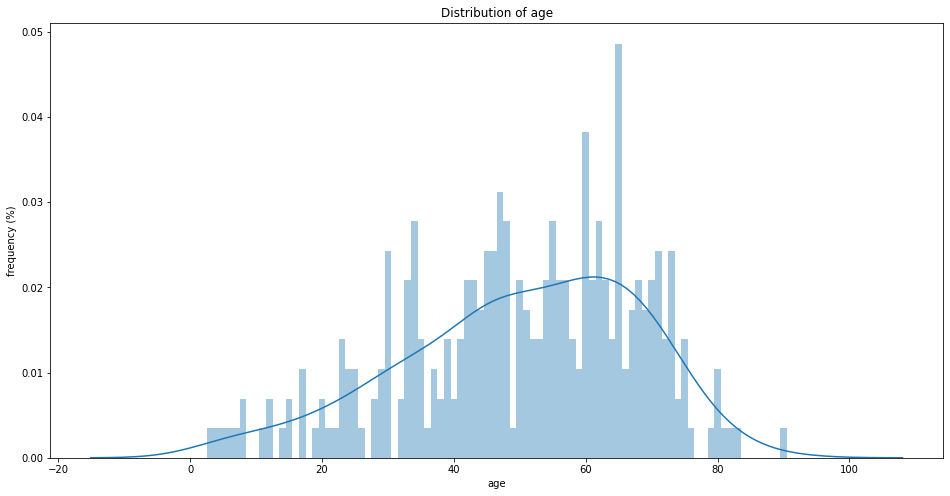

In [74]:
plt.figure(figsize=(16,8))
sns.distplot(df_cln['age'].dropna(), bins=range(0,100), hist_kws={'align':'left'});
plt.ylabel('frequency (%)')
plt.title('Distribution of age')

index = pd.Index(df_cln['age'])
ages = index.value_counts().sort_index()
probability = np.divide(ages.values, ages.values.sum())

print('Number of Nan: {}'.format(df_cln['age'].isnull().sum()))

for i in range(df_cln['age'].isnull().sum()):
    val = np.random.choice(ages.index, 1, replace=True, p=probability)
    df_cln['age'].fillna(value=val[0], limit=1, inplace=True)
    print('1 Nan replaced with: {}'.format(val[0]))
    
print('Number of Nan after the operation: {}'.format(df_cln['age'].isnull().sum()))

Results shows that values has been taken in the range 42-70 were there is the highest concentration of samples in the original distribution.

The same operation has been done for all the other columns with missing values.

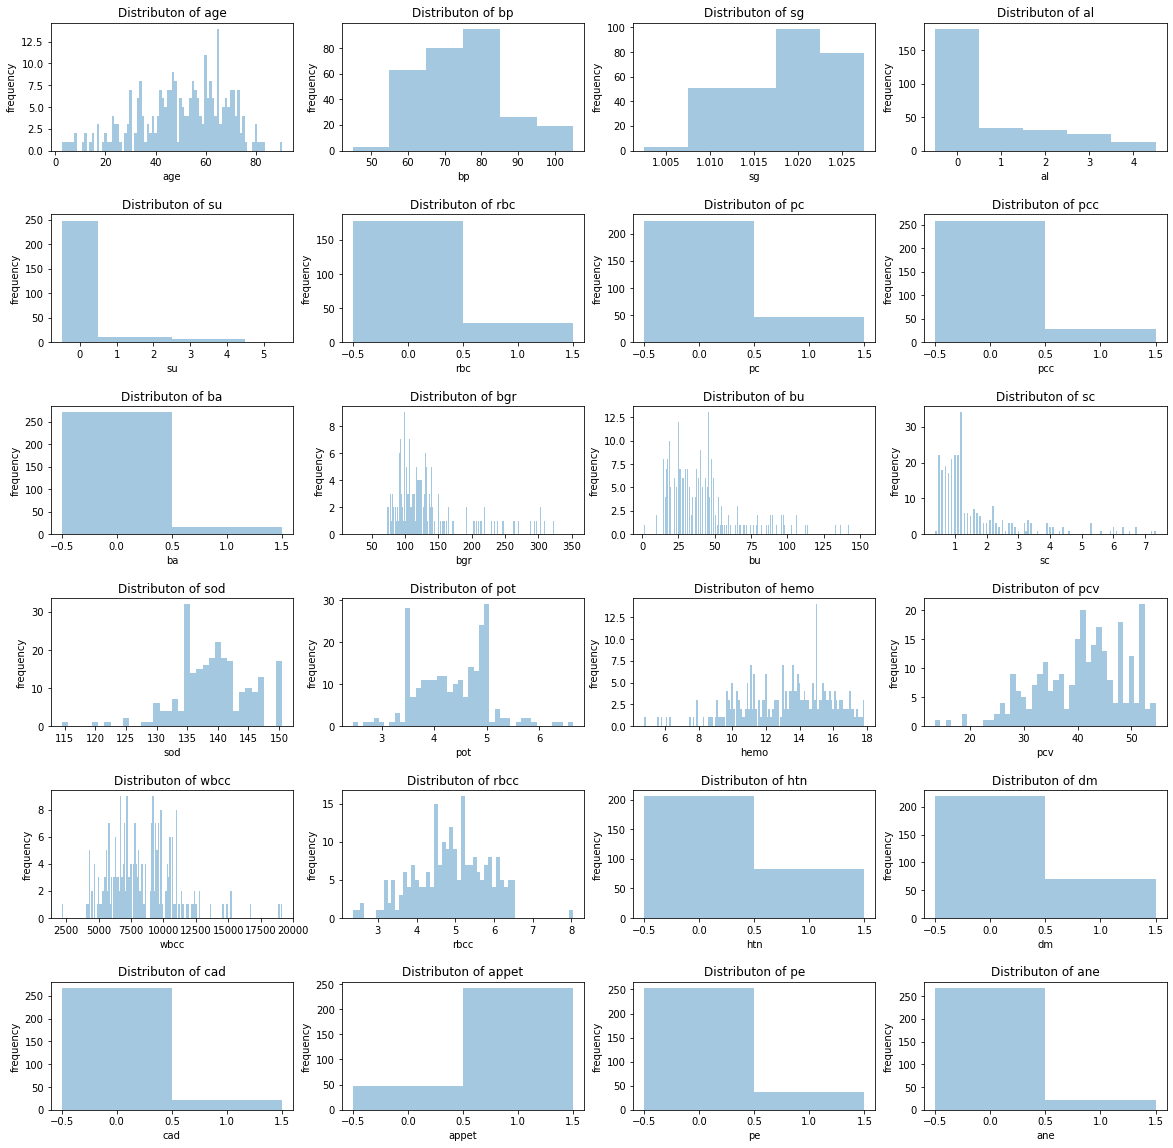

In [75]:
f, axes = plt.subplots(ncols=4, nrows=6, figsize=(20,20))
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)

for ax, column in zip(axes.flatten(), df_cln.columns):
    index = pd.Index(df_cln[column])
    vals = index.value_counts().sort_index()
    probability = np.divide(vals.values, vals.values.sum())

    bins = np.arange(vals.index.values.min(), 
                     vals.index.values.max()+1.01*np.diff(vals.index.values).min(), 
                     np.diff(vals.index.values).min())

    sns.distplot(df_cln[column].dropna(), bins=bins, hist_kws={'align':'left'}, ax=ax, norm_hist=False, kde=False);
    ax.set_ylabel('frequency')
    ax.set_title('Distributon of {}'.format(column))
    
    for i in range(df_cln[column].isnull().sum()):
        val = np.random.choice(vals.index, 1, replace=True, p=probability)
        df_cln[column].fillna(value=val[0], limit=1, inplace=True)
            
plt.show()

Now, let's check if all these changes have affected statistics and class distribution to detect if we introduced any unbalance.

In [76]:
df_cln.describe()

age          bp          sg          al          su         rbc  \
count  291.000000  291.000000  291.000000  291.000000  291.000000  291.000000   
mean    50.350515   74.604811    1.018488    0.776632    0.281787    0.123711   
std     17.609583   11.541462    0.005441    1.212693    0.856805    0.329819   
min      3.000000   50.000000    1.005000    0.000000    0.000000    0.000000   
25%     39.000000   70.000000    1.015000    0.000000    0.000000    0.000000   
50%     53.000000   70.000000    1.020000    0.000000    0.000000    0.000000   
75%     64.500000   80.000000    1.025000    1.000000    0.000000    0.000000   
max     90.000000  100.000000    1.025000    4.000000    5.000000    1.000000   

               pc         pcc          ba         bgr  ...         pcv  \
count  291.000000  291.000000  291.000000  291.000000  ...  291.000000   
mean     0.171821    0.099656    0.054983  132.896907  ...   40.955326   
std      0.377875    0.300057    0.228339   55.639694  ...    7.971159   
min      0.000000    0.000000    0.000000   22.000000  ...   14.000000   
25%      0.000000    0.000000    0.000000   99.000000  ...   35.500000   
50%      0.000000    0.000000    0.000000  118.000000  ...   42.000000   
75%      0.000000    0.000000    0.000000  140.000000  ...   47.500000   
max      1.000000    1.000000    1.000000  352.000000  ...   54.000000   

               wbcc        rbcc        htn          dm         cad  \
count    291.000000  291.000000  291.00000  291.000000  291.000000   
mean    8378.006873    4.896564    0.28866    0.240550    0.082474   
std     2515.043870    0.920413    0.45392    0.428154    0.275560   
min     2200.000000    2.400000    0.00000    0.000000    0.000000   
25%     6700.000000    4.300000    0.00000    0.000000    0.000000   
50%     8100.000000    4.900000    0.00000    0.000000    0.000000   
75%     9800.000000    5.600000    1.00000    0.000000    0.000000   
max    19100.000000    8.000000    1.00000    1.000000    1.000000   

            appet          pe         ane       class  
count  291.000000  291.000000  291.000000  291.000000  
mean     0.835052    0.127148    0.075601    0.487973  
std      0.371773    0.333712    0.264815    0.500716  
min      0.000000    0.000000    0.000000    0.000000  
25%      1.000000    0.000000    0.000000    0.000000  
50%      1.000000    0.000000    0.000000    0.000000  
75%      1.000000    0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 25 columns]

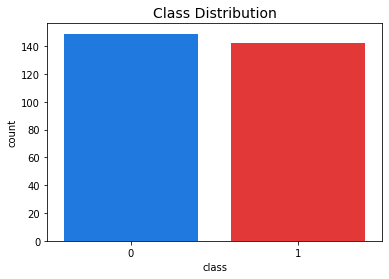

In [77]:
sns.countplot('class', data=df_cln, palette=colors)
plt.title('Class Distribution', fontsize=14)
plt.show()

Deleting extreme outliers and some kind instances with missing values, leads to loose 109 instances in total. 

However, the process not only does not introduce unbalance in class distribution but, since almost all of those instances belong to class 0 (notckd), it leads to a dataset which has almost the same number of instances for both classes.

## 2.5 Further Analysis

In this section, we will perform an analysis of correlations among predictors and among predictors and class. The correlation matrix allows to know if there is any statistical relationship between two attributes, and it is particularly interesting to see if values assumed by attributes are related to Positive or Negative class. The correlation matrix is showed through the *heatmap* below. 

From it we can see that there are some attributes which are **positively correlated**, highlighted with red tones, such as *hemo-pcv*, *sc-bu* and *htn-dm*. This means that for these pairs of attributes the higher the first is, the higher the second is. This can be graphically verified with pairplots below. 

There are also some attributes that are **negatively correlated**, highlighted with blue tones, such as *htn-hemo*, *htn-pcv*, *sc-hemo* and *sc-pcv*. This means that for these pairs of attributes the higher the first is, the lower the second is, as showed by pairplots. 

Considering correlations with the **class**, the most negatively correlated are *hemo*, *sg* and *pcv*. Hence, the lower these value are, the more likely the patient is Positive to CKD. The most positively correlated are *htn*, *al* and *dm*. So, the higher these value are, the more likely the patient is Positive to CKD. While there is no correlation with the value of *pot*. This confirms what we inferred during the analysis of boxplots divided per class.

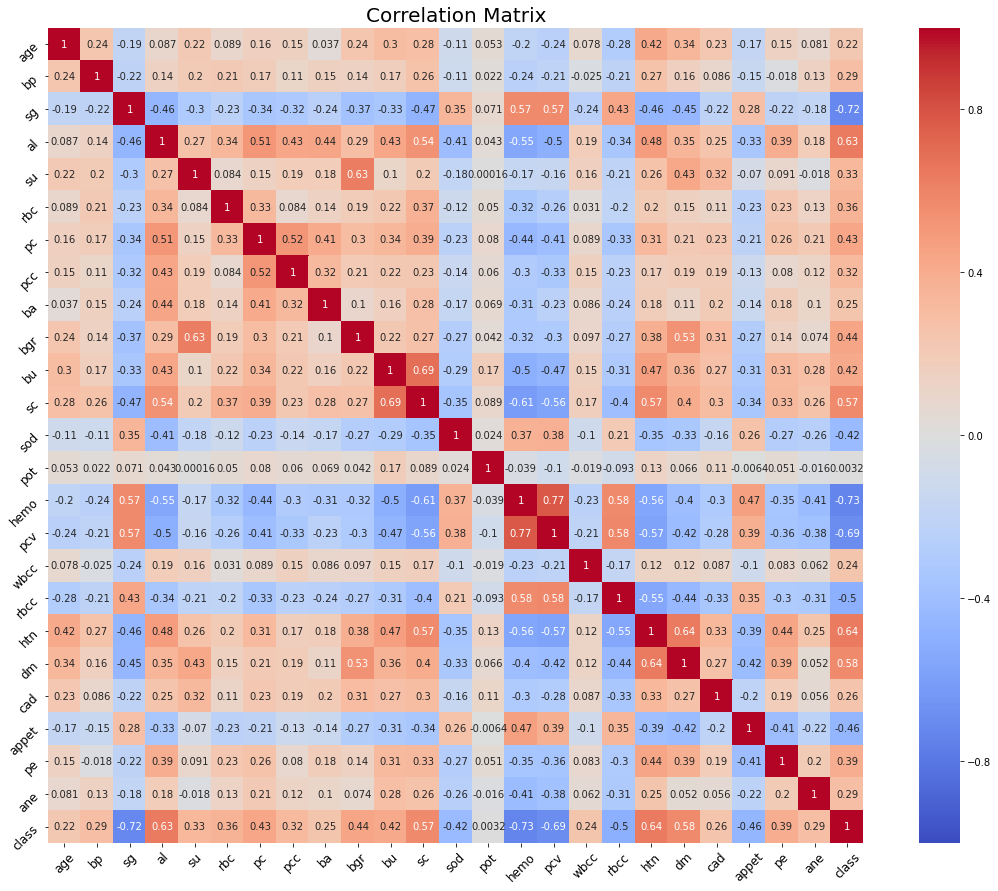

In [78]:
plt.figure(figsize=(20, 15))

axes = sns.heatmap(df_cln.corr(),
                   cmap='coolwarm',
                   annot=True, vmin=-1, vmax=1,
                   square=True)

axes.tick_params(labelsize=12, rotation=45)
plt.title('Correlation Matrix', fontsize=20);

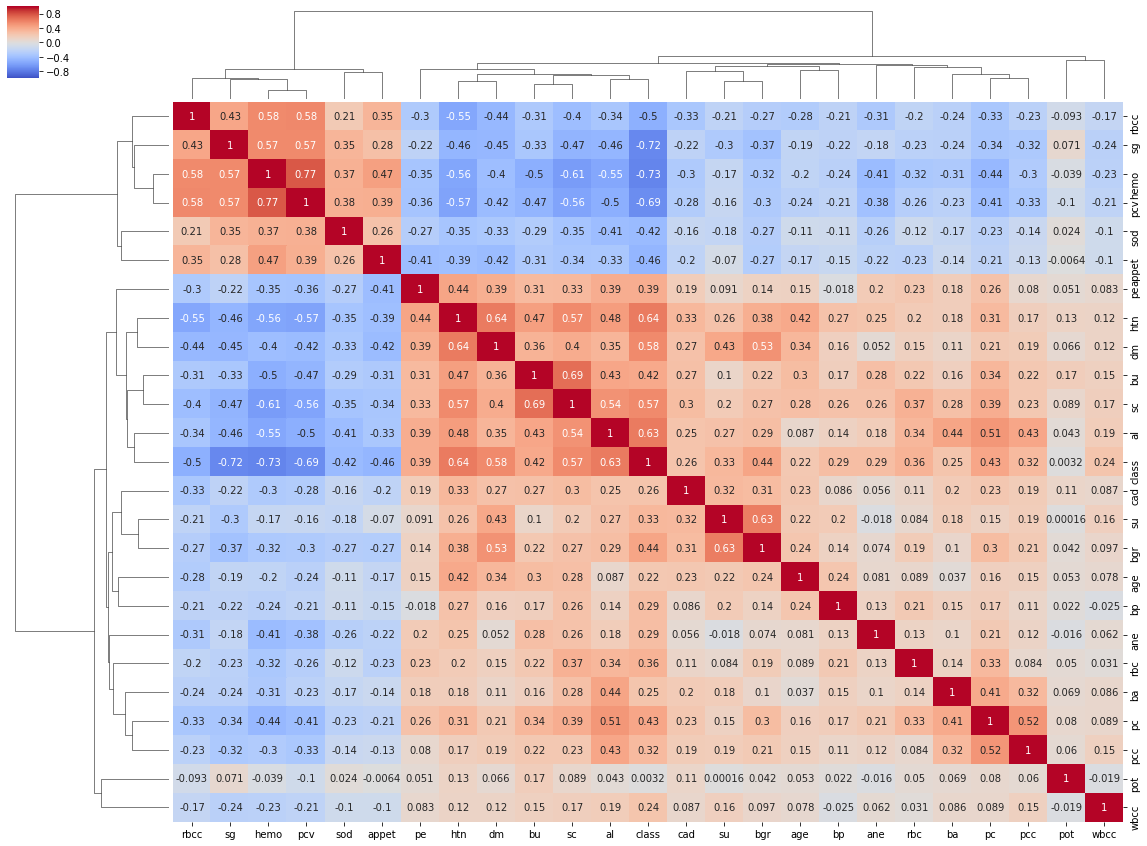

In [79]:
sns.clustermap(df_cln.corr(), 
               annot=True, 
               cmap='coolwarm', 
               vmin=-1, vmax=1, 
               figsize=(20, 15))

In [45]:
sns.pairplot(df_cln, hue='class', palette=colors, height=6)

# 3. Principal Component Analysis

In this section, we will use Principal Component Analysis (PCA) to perform a dimensionality reduction of our data. PCA is an unsupervised approach (it involves only features and no target class) that allows to find a low-dimensional representation of a data set that captures as much of the information as possible. The idea is to find a smaller number of representative variables, known as Principal Components, that collectively explain most of the variability in the original set. Specifically, PCA seeks the directions along which original data are characterized by the maximum variance (the higher the variance the more data are separable, but not always) and projects data in a lower dimensional subspace (defined by these directions). Principal Components are computed with the constraint that each of them is orthogonal to the others, hence the new dimensions are uncorrelated. 

Given our data matrix of $d$ samples and $n$ features $\underset{dxn}{X}=\{x_{1}...x_{n}\}$, where $x_{i}$ are columns of d elements, we want to reduce dimensions from $n$ to $k$ using PCA. To do that, we can follow the steps below:

- Subtract sample mean from the data $z_{i}=x_{i}-\hat{\mu}$, where $\hat{\mu}=\frac{1}{n}\sum_{i=1}^{n}x_{i}$

- Compute the Covariance matrix $\underset{nxn}{S}=Z^{t}Z$

- Compute eigenvectors $\{e_{1},e_{2},...,e_{k}\}$ corresponding to the $k$ largest eigenvalues $\lambda$ of $S$, so we get the matrix $\underset{nxk}{E}=[e_{1}...e_{k}]$, where $e_{i}$ are columns and are ordered according to $\lambda$ values which give measures of the explained variance

- The desired $Y$ which is the closest approximation to $X$ is $\underset{dxk}{Y}=\underset{dxn}{Z}\,\underset{nxk}{E}$

So, the first principal component of a set of features $\{z_{1},z_{2},...,z_{n}\}$ is the normalized linear combination of the features:

$y_{1}=e_{11}z_{1}+e_{21}z_{2}+...+e_{n1}z_{n}$ 

with the constraint that $\sum_{j=1}^{n}e_{j1}^{2}=1$

where $e_{11},..,e_{n1}$ are referred as loadings of the first principal component and $y_{11},..,y_{n1}$ as scores of the first principal component.  
The loading vector $e_{i}$ defines the direction along which the data vary the most. The principal component scores $y_{11},..,y_{n1}$ represent the projection of the initial data $x_{11},..,x_{n1}$ onto this direction.

Often it is possible that features are measured in different units and since PCA uses variance to find the new axis, variable characterized by an higher variance will influence the process more than others. Hence, it is important to scale each variable to have standard deviation one so that all variable will have the same influence.

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In order to preserve some data for the final testing of models that will be selected in the next section, the dataset has been randomly split into two sets: Train Set (60%) and Test Set (40%). The reasons of this operation will be better explained in the next section.

In this work a random seed for the split has been set in order to make the experiment repeatable. To obtain different random sets at each iteration it is possible to set the random_state parameter to ‘None’.

In [81]:
TRAIN_SIZE = 0.60
TEST_SIZE = 0.40

X = df_cln.drop('class', axis=1)
y = df_cln['class']

# Split the whole dataset into train set (60%) and test set (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=TEST_SIZE,
                                                    random_state=random_state,
                                                    shuffle=True)

# Check train and test sets sizes
print('Train Set:', len(X_train))
print('Test Set:', len(X_test))

Train Set: 174
Test Set: 117


After dividing training set and test set, a feature scaling with Z-score normalization has been performed on the data using the StandardScaler provided by scikit-learn. It standardizes features by removing the mean and scaling to unit variance. This operation is important since it is possible that features are measured in different units.

The standard score of a sample $x$ is calculated as:

$z = \frac{x - \mu}{\sigma}$

where $\mu$ and $\sigma$ are the mean and the standard deviation of the training samples respectively.

The fit method has been called on the train set in order to compute mean and the standard deviation on this set, and then use these values for later scaling.

In [82]:
# Standardize data using the StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Compute summary statistics to check how mean and variance changed
df_X = pd.DataFrame(data=X_train, columns=X.columns)
df_X.describe()

age            bp            sg            al            su  \
count  1.740000e+02  1.740000e+02  1.740000e+02  1.740000e+02  1.740000e+02   
mean   1.103842e-16 -5.104474e-16 -4.830363e-14 -3.190296e-17  3.624176e-16   
std    1.002886e+00  1.002886e+00  1.002886e+00  1.002886e+00  1.002886e+00   
min   -2.697144e+00 -2.093680e+00 -2.576542e+00 -6.143902e-01 -3.346679e-01   
25%   -6.393094e-01 -3.953101e-01 -6.728548e-01 -6.143902e-01 -3.346679e-01   
50%    2.217704e-01 -3.953101e-01  2.789886e-01 -6.143902e-01 -3.346679e-01   
75%    8.055534e-01  4.538746e-01  1.230832e+00  2.143222e-01 -3.346679e-01   
max    1.797984e+00  2.152244e+00  1.230832e+00  2.700459e+00  4.418982e+00   

                rbc            pc           pcc            ba           bgr  \
count  1.740000e+02  1.740000e+02  1.740000e+02  1.740000e+02  1.740000e+02   
mean  -2.552237e-17 -1.059178e-16 -1.103842e-16  8.677605e-17 -1.190778e-16   
std    1.002886e+00  1.002886e+00  1.002886e+00  1.002886e+00  1.002886e+00   
min   -3.902792e-01 -4.747127e-01 -3.396831e-01 -2.721655e-01 -1.969320e+00   
25%   -3.902792e-01 -4.747127e-01 -3.396831e-01 -2.721655e-01 -6.393306e-01   
50%   -3.902792e-01 -4.747127e-01 -3.396831e-01 -2.721655e-01 -2.605918e-01   
75%   -3.902792e-01 -4.747127e-01 -3.396831e-01 -2.721655e-01  1.093392e-01   
max    2.562268e+00  2.106537e+00  2.943920e+00  3.674235e+00  3.843880e+00   

       ...          hemo           pcv          wbcc          rbcc  \
count  ...  1.740000e+02  1.740000e+02  1.740000e+02  1.740000e+02   
mean   ... -8.039546e-17  1.052798e-17  2.169401e-17 -6.463540e-16   
std    ...  1.002886e+00  1.002886e+00  1.002886e+00  1.002886e+00   
min    ... -3.231906e+00 -3.475231e+00 -2.600549e+00 -2.775419e+00   
25%    ... -7.437937e-01 -6.950463e-01 -7.105992e-01 -6.843673e-01   
50%    ...  1.366152e-01  1.263721e-01 -1.315971e-01  8.602028e-02   
75%    ...  7.395039e-01  8.214183e-01  6.658963e-01  7.463525e-01   
max    ...  1.744318e+00  1.579651e+00  3.080226e+00  1.736851e+00   

                htn            dm           cad         appet            pe  \
count  1.740000e+02  1.740000e+02  1.740000e+02  1.740000e+02  1.740000e+02   
mean  -7.656711e-18  7.656711e-17  4.274997e-17  1.537723e-16 -5.104474e-18   
std    1.002886e+00  1.002886e+00  1.002886e+00  1.002886e+00  1.002886e+00   
min   -6.172134e-01 -5.285941e-01 -3.071476e-01 -2.385856e+00 -3.804430e-01   
25%   -6.172134e-01 -5.285941e-01 -3.071476e-01  4.191368e-01 -3.804430e-01   
50%   -6.172134e-01 -5.285941e-01 -3.071476e-01  4.191368e-01 -3.804430e-01   
75%    1.620185e+00 -5.285941e-01 -3.071476e-01  4.191368e-01 -3.804430e-01   
max    1.620185e+00  1.891811e+00  3.255764e+00  4.191368e-01  2.628515e+00   

                ane  
count  1.740000e+02  
mean  -1.352686e-16  
std    1.002886e+00  
min   -2.597781e-01  
25%   -2.597781e-01  
50%   -2.597781e-01  
75%   -2.597781e-01  
max    3.849439e+00  

[8 rows x 24 columns]

The effect of this operation can be seen on the summary statistics above: all features have now mean 0 and variance 1.

To have an idea of how much of the information is lost by projecting the observation in a lower dimensional space, we analyze the Proportion of Variance Explained (PVE) by each principal component. The total variance of the dataset (variable centered) is  

$\sum_{j=1}^{n}Var(X_{j})=\sum_{j=1}^{n}\frac{1}{d}\sum_{i=1}^{d}x_{ij}^{2}$

and the variance explained by the $m^{th}$ principal component is

$\frac{1}{d}\sum_{j=1}^{d}y_{im}^{2}=\frac{1}{d}\sum_{i=1}^{d}\left(\sum_{j=1}^{n}e_{jm}x_{ij}\right)^{2}$

therefore, the PVE of the $m^{th}$ principal component is

$\frac{\sum_{i=1}^{d}\left(\sum_{j=1}^{n}e_{jm}x_{ij}\right)^{2}}{\sum_{j=1}^{n}\sum_{i=1}^{d}x_{ij}^{2}}$

The plot below show the PVE of each principal component and the Cumulative PVE. From it we can see that the first principal component explains 31% of the variance in the data, while all the others explain less than 8% each. 

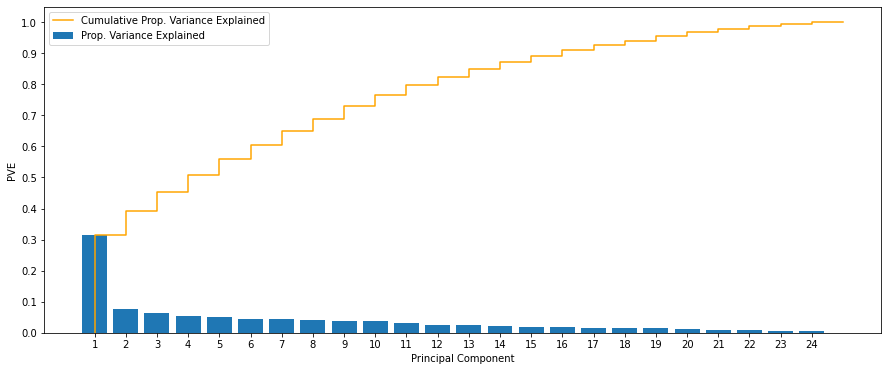

Individual:
 [0.31486374 0.0764896  0.06226538 0.05550958 0.05040873 0.04545749
 0.04409478 0.04031514 0.03919151 0.03681329 0.03258272 0.02595692
 0.02469361 0.02331398 0.01982601 0.01755249 0.01625187 0.01539512
 0.01411735 0.01276398 0.00968308 0.00861725 0.00735497 0.0064814 ]
Cumulative:
 [0.3148637438622382, 0.3913533454615158, 0.4536187293994419, 0.5091283138086896, 0.5595370451105801, 0.6049945345836417, 0.6490893121277349, 0.6894044477294418, 0.7285959627148181, 0.765409248704801, 0.7979919705081726, 0.8239488879760205, 0.8486424977751718, 0.8719564728066875, 0.8917824875671799, 0.9093349772132838, 0.9255868498822049, 0.9409819714039706, 0.9550993259815564, 0.9678633071353435, 0.9775463880797364, 0.9861636378351124, 0.9935186033567227, 1.0]


In [83]:
pca = PCA().fit(X_train)

def plot_pca_variance(pca):
    cumulative = [0]
    for i, v in enumerate(pca.explained_variance_ratio_):
        cumulative.append(v+cumulative[i])
    
    plt.figure(figsize=(15, 6))
    plt.bar(x=range(1,25), height=pca.explained_variance_ratio_, label='Prop. Variance Explained')
    plt.step(x=range(1,26), y=cumulative, label='Cumulative Prop. Variance Explained', color='orange')
    plt.xticks(np.arange(1, 25, 1.0))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel('Principal Component')
    plt.ylabel('PVE')
    plt.legend()
    plt.show()
    
    print('Individual:\n', pca.explained_variance_ratio_)
    print('Cumulative:\n', cumulative[1:])
    
plot_pca_variance(pca)

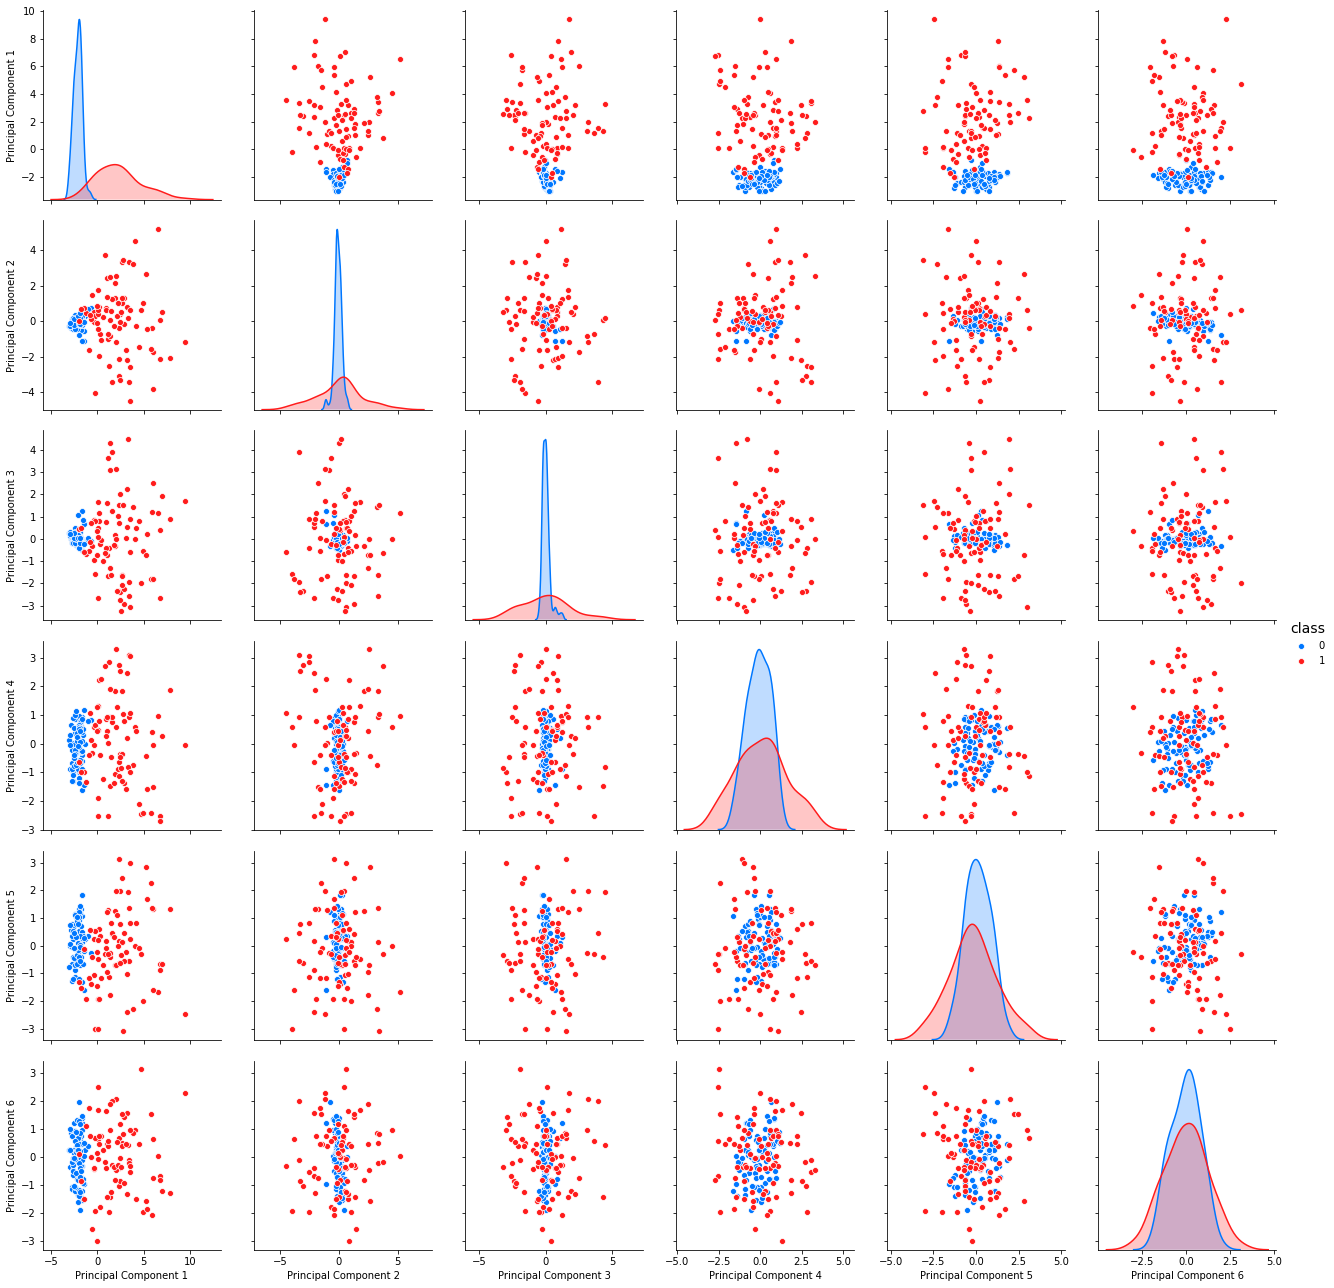

In [51]:
pca1 = PCA(n_components=6)
X_train_pca1 = pca1.fit_transform(X_train)
X_test_pca1 = pca1.transform(X_test)

columns=['Principal Component 1', 'Principal Component 2',
         'Principal Component 3','Principal Component 4',
         'Principal Component 5','Principal Component 6']

df_pca1 = pd.DataFrame(data=X_train_pca1, columns=columns)
df_pca1['class'] = y_train.values

g = sns.pairplot(df_pca1, hue='class', palette=colors, vars=columns, height=3)
g._legend.get_title().set_fontsize(14)

For the next analysis we will try to use the first two principal component that will allows us to visualize data in two dimensional graph. Despite together they explain only about 40% of variance, by using only these two as predictors will allows us to obtain good classifiers as discussed in the next section.

So considering these two dimensions, the classification problem consists in finding the classifier that allows to 'better' separate blu (Negative) from red (Positive) observations showed in the scatter plot below, and then test how it performs on new data.

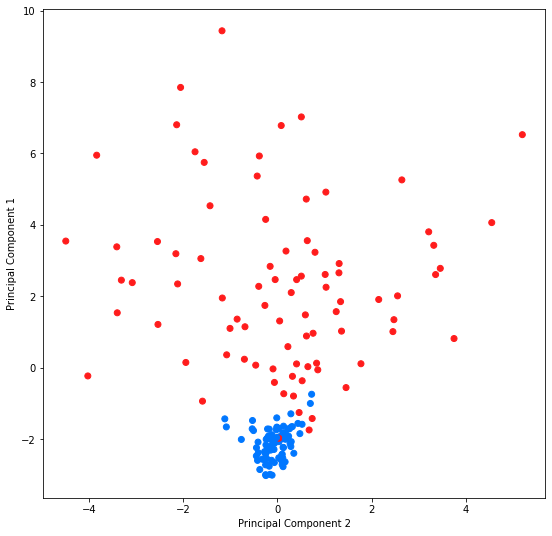

In [84]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


from matplotlib.colors import ListedColormap

plt.figure(figsize=(9,9))
plt.scatter(X_train_pca[:,1], X_train_pca[:,0], c=y_train.values, cmap=ListedColormap(colors))
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 1')
plt.show()

# 3. Classification

In this section, we will build some classification models, tune some hyper-parameters and evaluate the performance changes in order to find the best classifier for our data. Specifically, we will analyze the behavior of 5 different classification algorithms: 

- k-Nearest Neighbor 
- Logistic Regression 
- SVM 
- Decision Tree 
- Random Forest

As introduced above, the initial dataset has been split in two sets (Train and Test) in order to preserve some data for the final evaluation. We perform all the operations of hyper-parameters tuning without considering them, so that the choice of hyper-parameters values is not affected by these data, and then we can see how the selected model works on new data i.e. how good it is to generalize. 

Therefore, models are trained and evaluated using the K-Fold Cross Validation on the train set, and once found the best configuration, the final evaluation can be done on the test set. 

The K-Fold Cross Validation is a validation technique which consists in randomly dividing the set of observations into k groups, known as folds, and use the one fold as validation set and the other k-1 folds as training set. The accuracy is computed on the current validation set. The process is repeated k times, considering each time a different split for the validation, so at the end we will have k values of accuracy. The final evaluation is obtained by computing the average of these values.

In our experiment we will use the Stratified 10-Fold Cross Validation. This is a variation of 10-Fold Cross Validation that returns stratified folds: the folds are made by preserving the percentage of samples for each class.

Firstly, we need to import some useful tools from sklearn library.

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## 3.2 K-Nearest Neighbor

The K-Nearest Neighbors is a very simple algorithm which is based on the idea that an element can be classified according to his neighbors. The principle behind this method indeed is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number K of samples is defined by the user while the distance can be any metric measure such as the standard Euclidean distance:

$dist = \sqrt{\sum_{k=1}^{n}(p_{k} - q_{k})^{2}}$

Where n is the number of dimensions (attributes) and $p_{k}$ and $q_{k}$ are, respectively, the $k^{th}$ attributes (components) of data objects p and q.

The nearest neighbor algorithm is particularly sensitive to outliers so that a single mislabeled example can dramatically change the prediction. Therefore, the choice of K is extremely important for a correct classification: if the value of K is very low, classification could be affected by outliers while, if it is too large, everything tend to be classified as the most probable class.

The K-NN classifiers are ‘memory based’: they do not attempt to construct a general internal model, but simply store instances of the training data. This allows to have a training time of 0 but introduce another inconvenient. When a new observation has to be classified, the distances between this element and those in the train data have to be computed and then it is classified using a simple majority vote among the K nearest neighbors. Therefore, it can be inefficient when the train set is very huge and so inconvenient in real time applications where it is very important to have a prediction as fast as possible.

Despite its simplicity, nearest neighbors has been successful in a large number of classification: it is often successful in classification situations where the decision boundaries are very irregular.

In the following, a Grid Search will be performed in order to find the best value of K. Since we are dealing with a binary classification problem, we choose only odd values of K. The 10-Fold Cross Validation will be used as validation strategy and the value that allows to achieve the highest accuracy will be selected.

Best hyper-parameters: {'n_neighbors': 5}
Best accuracy: 0.9655172413793104


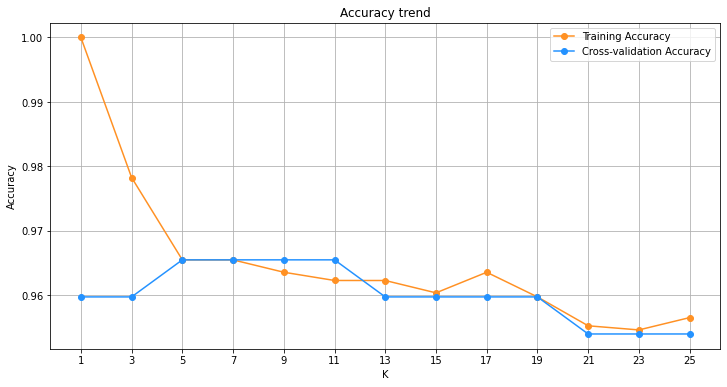

In [95]:
parameters = {'n_neighbors':[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]}

clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, return_train_score=True)
clf.fit(X_train_pca, y_train)

plt.figure(figsize=(12,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy trend')
plt.plot(parameters['n_neighbors'], clf.cv_results_['mean_train_score'], marker='o', color="#ff9124", label='Training Accuracy')
plt.plot(parameters['n_neighbors'], clf.cv_results_['mean_test_score'], marker='o', color="#2492ff", label='Cross-validation Accuracy')
plt.xticks(parameters['n_neighbors'])
plt.grid(True)
plt.legend()

print('Best hyper-parameters:', clf.best_params_)
print('Best accuracy:', clf.cv_results_['mean_test_score'].max())
#pd.DataFrame(data=clf.cv_results_)

# Create K-Nearest Neighbors Classifier with the best K
knn = KNeighborsClassifier(**clf.best_params_)

As we can see, the best value of K is 5 which allows to achieve a very high accuracy (about 96,5% using cross validation). Higher values of K instead lead to a constant decrease of performance. 

Let's check now the **Confusion Matrix** to analyze the wrong predictions and compute some other performance metrics such as Precision, Recall and F1-score.

Confusion Matrix is a performance measurement for machine learning classification problem. It consists in a table with 4 different combinations of predicted and actual values known as True Positive, True Negative, False Positive and False Negative. 

- **True Positive**: number of samples correctly predicted as positive
- **True Negative**: number of samples correctly predicted as negative
- **False Positive**: number of samples incorrectly predicted as positive
- **False Negative**: number of samples incorrectly predicted as negative


From these values it is possible to compute some other metrics such as:

- **Accuracy** $= \frac{TP+TN}{TP+TN+FP+FN}$ 
    
    which is the ratio of correct predictions to total predictions made.
    
    
- **Precision** $= \frac{TP}{TP+FP}$
    
    which is proportion of positive identifications that was actually correct.
    

- **Recall** $= \frac{TP}{TP+FN}$
    
    which is proportion of actual positives that was identified correctly.
    

- **F1-score** $= 2\cdot\frac{Precision \cdot Recall}{Precision+Recall}$
    
    which combines the previous two.


In our case, we may be interested in a Recall near to 1 (i.e. FN near to 0), since our is a preliminary disease screening of patients so we want to find all patients who actually have the disease and we can accept a lower precision (i.e. more FP) if the cost of the follow-up examination is not significant.

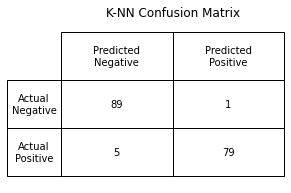

TN = 89, FP = 1, FN = 5, TP= 79

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.99      0.94      0.96        84

    accuracy                           0.97       174
   macro avg       0.97      0.96      0.97       174
weighted avg       0.97      0.97      0.97       174



In [96]:
def plot_confusion_matrix(y_pred, y, title):
    conf_mtx = confusion_matrix(y, y_pred)

    plt.figure(figsize=(4, 3))
    plt.table(cellText=conf_mtx, 
              colLabels=['Predicted\nNegative', 'Predicted\nPositive'], 
              rowLabels=['Actual\nNegative', 'Actual\nPositive'], 
              cellLoc='center', rowLoc='center', loc='center').scale(1, 4)
    plt.title(title)
    plt.axis('off')
    plt.show()

    tn, fp, fn, tp = conf_mtx.ravel()
    print('TN = {}, FP = {}, FN = {}, TP= {}\n\n{}'.format(tn, fp, fn, tp, 55*'-'))    
    print(classification_report(y, y_pred))
    
    
y_pred = cross_val_predict(knn, X_train_pca, y_train, cv=10)    
plot_confusion_matrix(y_pred, y_train, title='K-NN Confusion Matrix')

The ROC (Receiver Operating Characteristic) Curve displays the True Positive Rate (TPR/Recall/Sensitivity) on the y-axis, and on the x-axis the False Positive Rate defined as 

$FPR=1-Specificity$

where $Specificity=\frac{TN}{TN+FP}$ is proportion of actual negative that was identified correctly.

Considering the class probability, we classify an observation as Positive if  

$\hat{Pr}(Y=Positive|X)\geq threshold$

so, we can change these two metrics by changing the threshold in $[0,1]$. The top left corner of the plot is the “ideal” case with a false positive rate of zero, and a true positive rate of one. The AUC (area under the curve) allows to summarize the overall performance. A larger AUC is usually better.

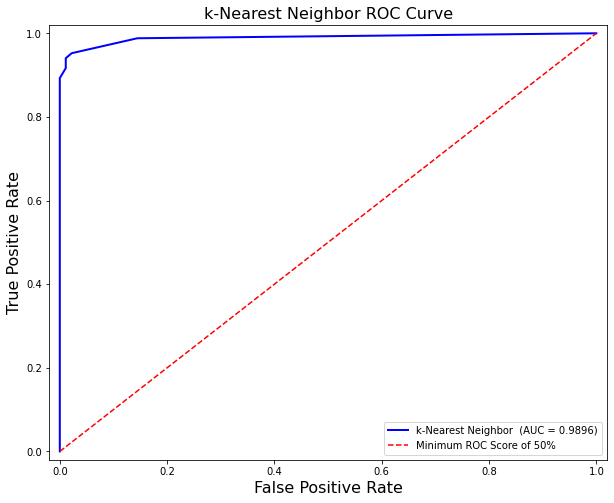

In [97]:
def plot_roc_curve(log_fpr, log_tpr, auc, title):
    plt.figure(figsize=(10,8))
    plt.plot(log_fpr, log_tpr, 'b', linewidth=2, 
             label='{}  (AUC = {:.4f})'.format(title,auc))
    plt.plot([0, 1], [0, 1], 'r--', 
             label='Minimum ROC Score of 50%')
    plt.title('{} {}'.format(title,'ROC Curve'), fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.02,1.02,-0.02,1.02])
    plt.legend()

    
y_pred = cross_val_predict(knn, X_train_pca, y_train, cv=10, method='predict_proba')[:, 1]
log_fpr, log_tpr, log_thresold = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)

plot_roc_curve(log_fpr, log_tpr, auc, title='k-Nearest Neighbor')

The Learning Curve plot shows the performances of the model on both Training and Validation set. It allows to make important analysis about our model: for instance, if we have high training score and low validation score at the same time it means that the model has overfit the data, or if the learning curve is still raising at the given training set size, it is likely that error might still decrease when providing more data to the model, so we should increase the training set.

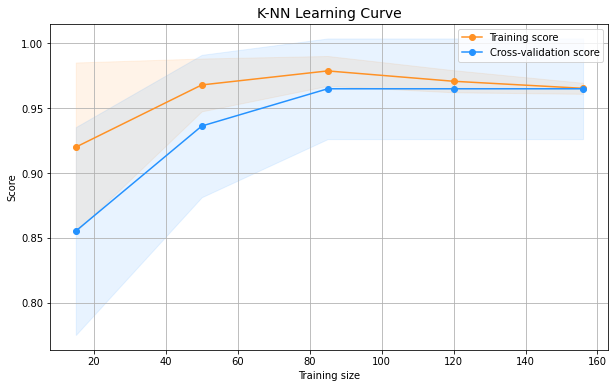

In [104]:
def plot_learning_curve(model, X, y, cv, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X, y=y, 
                                                            cv=cv, shuffle=True, 
                                                            train_sizes=np.linspace(.1, 1.0, 5))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    plt.title(title, fontsize=14)
    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.grid(True)
    plt.legend()

    
plot_learning_curve(knn, X=X_train_pca, y=y_train, cv=10, title="K-NN Learning Curve")

Once found the best K value, it has been used to train a new model using all the train set and then it has been evaluated on the test set.

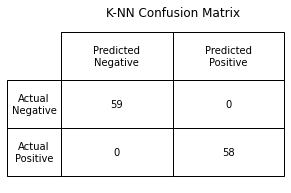

TN = 59, FP = 0, FN = 0, TP= 58

-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        58

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117



In [105]:
# Create KNN Classifier
knn = KNeighborsClassifier(**clf.best_params_)
# Train the model on 60% of inizial dataset
knn.fit(X_train_pca, y_train)
# Evaluate the model on the test set
#accuracy = knn.score(X_test_pca, y_test)
#print('Accuracy on Test set:', round(accuracy, 2))
y_pred = knn.predict(X_test_pca)    
plot_confusion_matrix(y_pred, y_test, title='K-NN Confusion Matrix')

## 3.1 Logistic Regression

Logistic Regression models the probability that Y belongs to a particular category, rather than directly the Y response. 

$p(X) = Pr(Y=1|X)$

In general, when the response variable assumes only values in the $[0,1]$ interval, may be inappropriate the use of linear regression that can produce output in the range $]-\infty, +\infty[$. By definition $Y = a + bX$, so it might produce probabilities less than zero or bigger than one.

Logistic Regression uses the **logistic function**:

$p(X) = \frac{e^{\beta _{0}+\beta _{1}X}}{1 + e^{\beta _{0}+\beta _{1}X}}$

The logistic function always produces an S-shaped curve in the $[0,1]$ interval, and so regardless of the value of X, it ensures that our estimate for $p(X)$ lies between $0$ and $1$.

After some manipulation, we obtain:

$\frac{p(X)}{1 - p(X)} = e^{\beta _{0}+\beta _{1}X}$

where $\frac{p(X)}{1 - p(X)}$ is called *odds*: given a value between $0$ and $\infty$, it returns a value between $0$ and $1$.

After taking the logarithm of both sides, we obtain:

$log\left(\frac{p(X)}{1 - p(X)}\right) = \beta _{0}+\beta _{1}X$

the element on the left side is called *log-odds* or *logit*. So, logistic regression has a logit that is linear in X.

In [106]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

clf = GridSearchCV(LogisticRegression(), parameters, cv=10)
clf.fit(X_train_pca, y_train)

print('Best hyper-parameters:', clf.best_params_)
print('Best accuracy:', clf.cv_results_['mean_test_score'].max())
#pd.DataFrame(data=clf.cv_results_)

# Create Logistic Regression Classifier with the best hyper-parameters
log_reg = LogisticRegression(**clf.best_params_)

Best hyper-parameters: {'C': 10}
Best accuracy: 0.9597701149425287


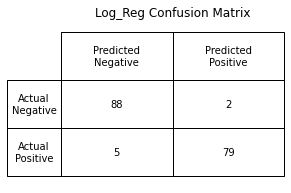

TN = 88, FP = 2, FN = 5, TP= 79

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        90
           1       0.98      0.94      0.96        84

    accuracy                           0.96       174
   macro avg       0.96      0.96      0.96       174
weighted avg       0.96      0.96      0.96       174



In [107]:
y_pred = cross_val_predict(log_reg, X_train_pca, y_train, cv=10)    
plot_confusion_matrix(y_pred, y_train, title='Log_Reg Confusion Matrix')

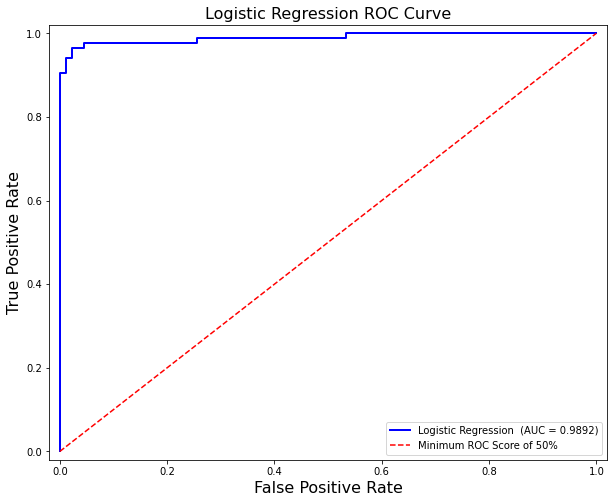

In [108]:
y_pred = cross_val_predict(log_reg, X_train_pca, y_train, cv=10, method='predict_proba')[:, 1]
log_fpr, log_tpr, log_thresold = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)

plot_roc_curve(log_fpr, log_tpr, auc, title='Logistic Regression')

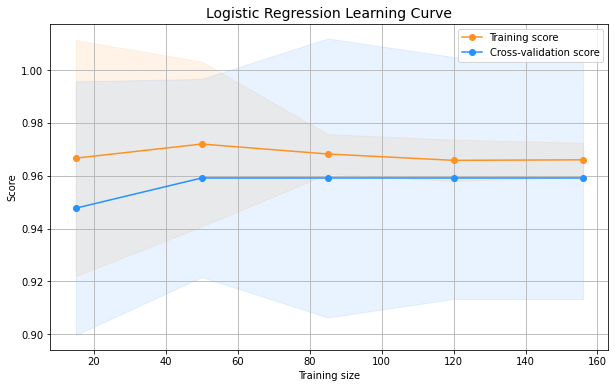

In [111]:
plot_learning_curve(log_reg, X=X_train_pca, y=y_train, cv=10, title="Logistic Regression Learning Curve")

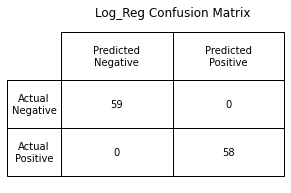

TN = 59, FP = 0, FN = 0, TP= 58

-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        58

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117



In [112]:
# Create Logistic Regression Classifier
log_reg = LogisticRegression(**clf.best_params_)
# Train the model on 60% of inizial dataset
log_reg.fit(X_train_pca, y_train)
# Evaluate the model on the test set
#accuracy = log_reg.score(X_test_pca, y_test)
#print('Accuracy on Test set:', round(accuracy, 2))
y_pred = log_reg.predict(X_test_pca)    
plot_confusion_matrix(y_pred, y_test, title='Log_Reg Confusion Matrix')

## 3.3 SVM

The **Support Vector Machine** (SVM) is a generalization of the Maximal Margin Classifier which is based on the concept of *hyperplane*: given a p-dimensional space, an hyperplane is a flat subspace of dimension p-1 and is defined as:

$f(X)=\beta _{0}+\beta _{1}X_{1}+\beta _{2}X_{2}+...+\beta _{p}X_{p}=0$

All points X that satisfy this equation lie on the hyperplane. 

The idea behind these classifiers is that it is possible to construct a hyperplane that separates the training data according to their class labels, and than classify a new element $x^{*}=\left ( x_{1}^{*}\, .\, .\, .\, x_{p}^{*} \right )^{T}$ according to which side of the hyperplane it is located: 

if $f(x^{*})>0$ we assign the test observation to class 1 else if $f(x^{*})<0$ we assign it to class -1.

The **Maximal Margin Classifier** choose the maximal margin hyperplane which is the separating hyperplane that is farthest from the training observations. This can be done by solving the following optimization problem:

$\underset{\beta _{0},\beta _{1},..,\beta _{p},M}{maximize}\, M$

subject to $\sum_{j=1}^{p}\beta _{j}^{2}=1$,

$y_{i}(\beta _{0}+\beta _{1}x_{i1}+\beta _{2}x_{i2}+...+\beta _{p}x_{ip})\geq M\; \; \;  \forall i=1,...,n$

However, in many cases data can belong to two classes that are not separable by a hyperplane, and so there is no maximal margin classifier. So, a 'soft' margin approach must be considered: the **Support Vector Classifier** tries to find an hyperplane that ‘almost’ separates the classes, allowing some observations to be on the incorrect side of the margin, or even the incorrect side of the hyperplane. This remove also the effect that a single observation can have on a maximal margin hyperplane and that can lead to a tiny margin. So, the optimization problem becomes:

$\underset{\beta _{0},\beta _{1},..,\beta _{p},\epsilon _{1},..,\epsilon _{n},M}{maximize}\, M$

subject to $\sum_{j=1}^{p}\beta _{j}^{2}=1$,

$y_{i}(\beta _{0}+\beta _{1}x_{i1}+\beta _{2}x_{i2}+...+\beta _{p}x_{ip})\geq M(1-\epsilon _{i})$,

$\epsilon _{i}\geq0$, $\sum_{i=1}^{n}\epsilon _{i}\leq C$

C is a tuning parameter that determines the number and severity of the violations to the margin that we will tolerate. So, when C is small we obtain a narrow margin that is rarely violated and this lead to a classifier that is highly fit to the data. As the value of C increase, the margin become wider (we allow more violations to it) and so we obtain a classifier that is less and less fit to the data. 

When classes are not-linearly separable, it is possible to enlarge the feature space, in order to accommodate a non-linear boundary between the classes, using *kernel* functions such as the *Radial Basis Function*, which takes the form:

$K(x_{i}, x_{i'}) = exp\left ( -\gamma \sum_{j=1}^{p}\left ( x_{ij} - x_{i'j} \right )^{2} \right )$

When the support vector classifier is combined with a non-linear kernel, the resulting classifier is known as a **Support Vector Machine**. Instead, if we choose a *linear* kernel defined as:

$K(x_{i}, x_{i'}) = \sum_{j=1}^{p}x_{ij}x_{i'j}$

we simply get back the Support Vector Classifier.

Also this time, we will perform a GridSearch in order to find the best hyperparameters. The hyperparameters that we consider are: 
- 'kernel' among the two defined above (linear or rbf);
- 'gamma' coefficient for the rbf kernel ('auto' = 1 / n_features and 'scale' = 1 / (n_features * X.var()));
- 'C' in scikit-learn, the parameter C of the SVC learner is the penalty for misclassifying a data point. It allows to specify the degree of tolerance we want to give when finding the decision boundary for the SVM. The bigger the C, the more penalty SVM gets when it makes misclassification and therefore, we will obtain narrow margins that are rarely violated. On the other hand, when C is small, the margin will be wider and we allow more violations to it.

In [138]:
parameters = {'kernel':('linear', 'rbf'), 
              'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'gamma':('scale', 'auto', 0.0000001, 0.00001, 0.001, 0.1, 10, 100)}

clf = GridSearchCV(SVC(), parameters, cv=10)
clf.fit(X_train_pca, y_train)

print('Best hyper-parameters:', clf.best_params_)
print('Best accuracy:', clf.cv_results_['mean_test_score'].max())
#pd.DataFrame(data=clf.cv_results_)

# Create Logistic Regression Classifier with the best hyper-parameters
svc = SVC(**clf.best_params_, probability=True)

Best hyper-parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy: 0.9712643678160919


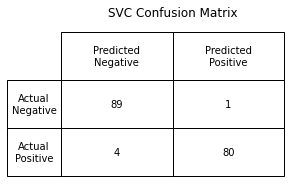

TN = 89, FP = 1, FN = 4, TP= 80

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        90
           1       0.99      0.95      0.97        84

    accuracy                           0.97       174
   macro avg       0.97      0.97      0.97       174
weighted avg       0.97      0.97      0.97       174



In [139]:
y_pred = cross_val_predict(svc, X_train_pca, y_train, cv=10)    
plot_confusion_matrix(y_pred, y_train, title='SVC Confusion Matrix')

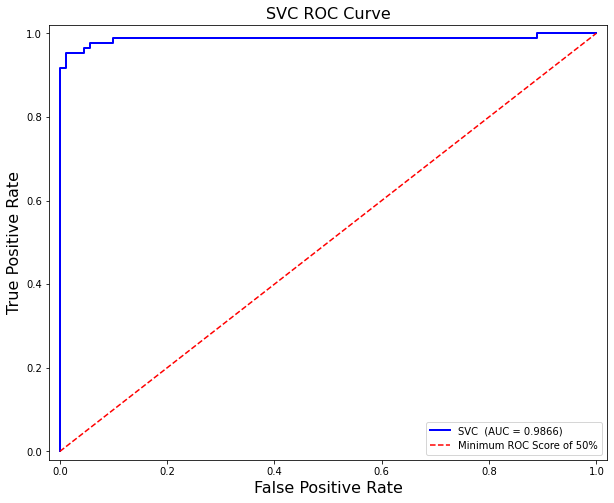

In [140]:
y_pred = cross_val_predict(svc, X_train_pca, y_train, cv=10, method='predict_proba')[:, 1]

log_fpr, log_tpr, log_thresold = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)

plot_roc_curve(log_fpr, log_tpr, auc, title='SVC')

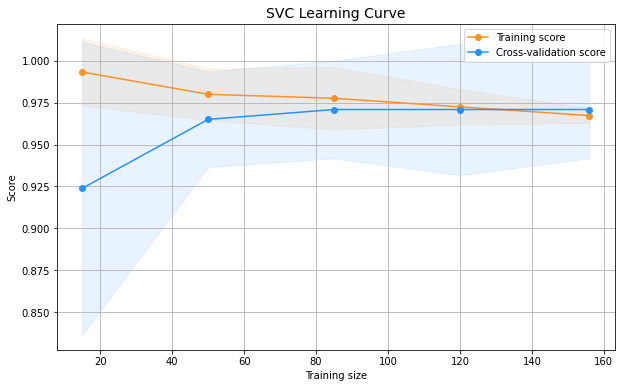

In [119]:
plot_learning_curve(svc, X=X_train_pca, y=y_train, cv=10, title="SVC Learning Curve")

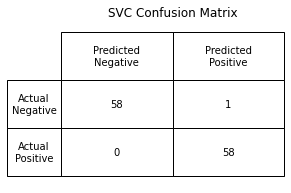

TN = 58, FP = 1, FN = 0, TP= 58

-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.98      1.00      0.99        58

    accuracy                           0.99       117
   macro avg       0.99      0.99      0.99       117
weighted avg       0.99      0.99      0.99       117



In [120]:
# Create SVM Classifier
svc = SVC(**clf.best_params_)
# Train the model on 70% of inizial dataset
svc.fit(X_train_pca, y_train)
# Evaluate the model on the test set
#accuracy = svc.score(X_test_pca, y_test)
#print('Accuracy on Test set:', round(accuracy, 2))
y_pred = svc.predict(X_test_pca)    
plot_confusion_matrix(y_pred, y_test, title='SVC Confusion Matrix')

## 3.4 Decision Tree

The Decision Tree is one of the easiest classification method to explain. It is based on a tree structure where internal nodes are decision nodes and endpoint nodes (leaves) provide the final outcome (class). Decision nodes decide which branch to use inside the tree according to values of features. 

The construction of a Classification Tree consists in dividing the predictor space $X_{1},X_{2},...,X_{p}$ into $J$ distinct and non-overlapping regions $R_{1},R_{2},...,R_{j}$. Then, each observation that falls into a region $R_{j}$, is simply classified as the most commonly occurring class of training observations in that region.

In order to build those regions, a top-down, greedy approach (also known as recursive binary splitting) is taken. The recursive approach is top-down because it begins at the top of the tree (at which point all observations belong to a single region) and then successively splits the predictor space; each split is indicated via two new branches further down on the tree. It is greedy because at each step of the tree-building process, the best split is made at that particular step. The choose of the predictor $X_{j}$ and the cutpoint $s$ is made according to a criterion for making the binary splits. The most common used are:
- Gini index defined by 

$gini = \sum_{k=1}^{K}\hat{p}_{mk}(1-\hat{p}_{mk})$

where ${p}_{mk}$ represents the proportion of training observations in the $m^{th}$ region that are from the $k^{th}$ class. Gini index provides a measure of total variance across the K classes and assumes small value if all of $\hat{p}_{mk}$'s are close to 0 or 1. 

- Entropy given by

$entropy = - \sum_{k=1}^{K}\hat{p}_{mk}log\, \hat{p}_{mk}$

also in this case, entropy assumes a value near zero if the $\hat{p}_{mk}$’s are all near zero or near one.

Both criterions are referred as measure of node purity: a small value indicates that a node contains predominantly observations from a single class (the node is pure). Therefore, at each step the choice of the predictor and the cutpoint is made so that it minimize this value. The process continues until a stopping criterion is reached; for instance, we may continue until no region contains more than a certain number of observations or the tree reaches a certain depth.

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

parameters = {"criterion": ("gini", "entropy"), 
              "max_depth": list(range(2,5,1)), 
              "min_samples_leaf": list(range(5,7,1))}

clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10)
clf.fit(X_train_pca, y_train)

print('Best hyper-parameters:', clf.best_params_)
print('Best accuracy:', clf.cv_results_['mean_test_score'].max())
#pd.DataFrame(data=clf.cv_results_)

# Create Logistic Regression Classifier with the best hyper-parameters
decision_tree = DecisionTreeClassifier(**clf.best_params_)

Best hyper-parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
Best accuracy: 0.9482758620689655


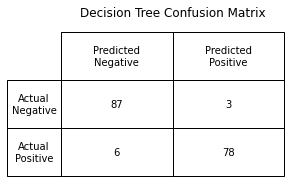

TN = 87, FP = 3, FN = 6, TP= 78

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        90
           1       0.96      0.93      0.95        84

    accuracy                           0.95       174
   macro avg       0.95      0.95      0.95       174
weighted avg       0.95      0.95      0.95       174



In [122]:
y_pred = cross_val_predict(decision_tree, X_train_pca, y_train, cv=10)    
plot_confusion_matrix(y_pred, y_train, title='Decision Tree Confusion Matrix')

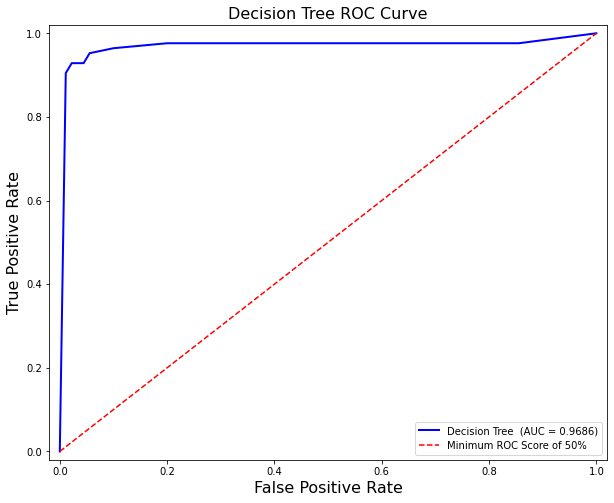

In [123]:
y_pred = cross_val_predict(decision_tree, X_train_pca, y_train, cv=10, method='predict_proba')[:, 1]

log_fpr, log_tpr, log_thresold = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)

plot_roc_curve(log_fpr, log_tpr, auc, title='Decision Tree')

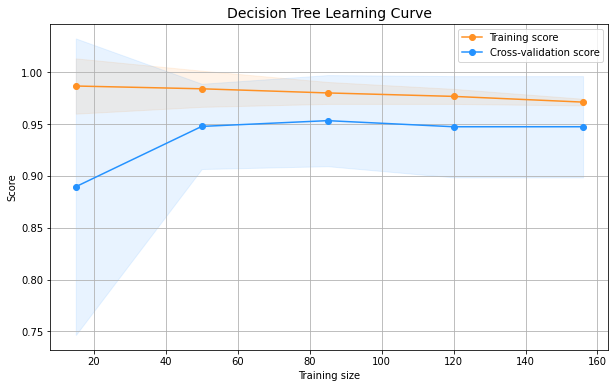

In [125]:
plot_learning_curve(decision_tree, X=X_train_pca, y=y_train, cv=10, title="Decision Tree Learning Curve")

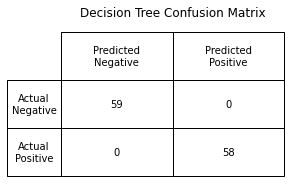

TN = 59, FP = 0, FN = 0, TP= 58

-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        58

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117



In [126]:
# Create Decision Tree Classifier
decision_tree = DecisionTreeClassifier(**clf.best_params_)
# Train the model on 70% of inizial dataset
decision_tree.fit(X_train_pca, y_train)
# Evaluate the model on the test set
#accuracy = decision_tree.score(X_test_pca, y_test)
#print('Accuracy on Test set:', round(accuracy, 2))
y_pred = decision_tree.predict(X_test_pca)    
plot_confusion_matrix(y_pred, y_test, title='Decision Tree Confusion Matrix')

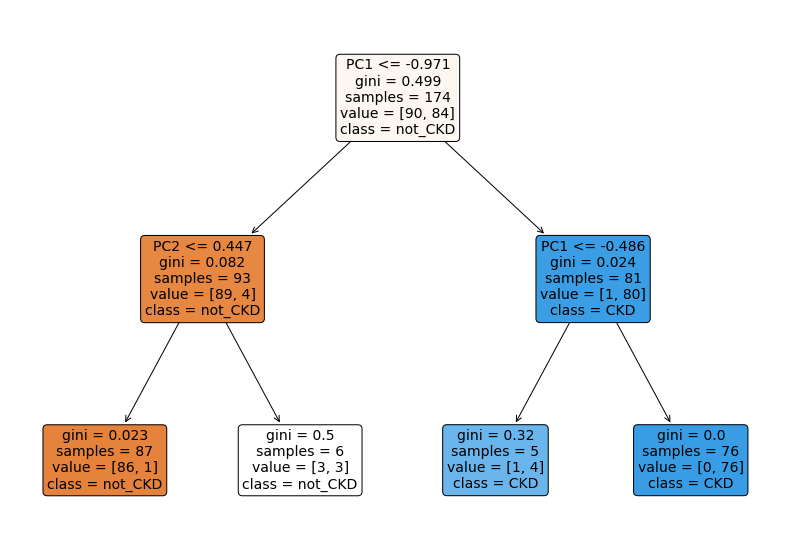

In [127]:
plt.figure(figsize=(14,10))
plot_tree(decision_tree, feature_names=['PC1', 'PC2'], class_names=['not_CKD', 'CKD'], filled=True, rounded=True, fontsize=14, impurity=True)
plt.show()

## 3.5 Random Forest

Usually Decision Tree do not have the same level of accuracy as other classifier. Despite in our case we also achieve good performance due to data easily separable, it is still the worst classifier. Decision Trees suffer from high variance, therefore it is possible to use some techniques that can help to improve predictive performance.

Bootstrap aggregation, or **Bagging**, is a general-purpose procedure for reducing the variance of a statistical learning method: given a set of $n$ independent observation $Z_{1},...,Z_{n}$, each with variance $\sigma^{2}$, the variance of the mean of the observation is given by $\sigma^{2}/n$ (i.e. averaging a set of observations reduces variance). The idea is to take many training sets from the population, build a separate prediction model using each training set, and average the resulting predictions. Since it is not practical because we generally do not have access to multiple training set, we can use the *bootstrap* technique (take repeated samples with replacement from the initial dataset) to generate B different bootstrapped training sets. Then, we train a Tree on each of the B sets in order to get the prediction, and finally average all the predictions to obtain the final result:

$f_{bag}(x)=\frac{1}{B}\sum_{b=1}^{B}f_{b}(x)$

These trees are grown deep, and are not pruned. Hence each individual tree has high variance, but low bias. Averaging these B trees reduces the variance. In the case of classification problem, the strategy of *majority vote* is used: the final prediction is the most commonly predicted class by the B Trees. 

**Random Forests** provide an improvement over bagged trees by way of a small tweak that decorrelates the trees. As in bagging, we build a number of decision trees on bootstrapped training samples. But when building these decision trees, each time a split in a tree is considered, a random sample of mpredictors is chosen as split candidates from the full set of p predictors. The split is allowed to use only one of those m predictors. A fresh sample of m predictors is taken at each split, and typically we choose m ≈ √ p that is, the number of predictors considered at each split is approximately equal to the square root of the total number of predictors. By considering a new subset of predictors at each split, allows Random Forest to obtain trees that are not too much similar to each other. Hence, the correlation among predictions from these trees decreases (averaging many highly correlated quantities does not lead to as large of a reduction in variance as averaging many uncorrelated quantities). 

In [128]:
from sklearn.ensemble import RandomForestClassifier

parameters = {"n_estimators": [100, 150, 200, 250, 500, 800, 1000]}

clf = GridSearchCV(RandomForestClassifier(), parameters, cv=10)
clf.fit(X_train_pca, y_train)

print('Best hyper-parameters:', clf.best_params_)
print('Best accuracy:', clf.cv_results_['mean_test_score'].max())
#pd.DataFrame(data=clf.cv_results_)

# Create Logistic Regression Classifier with the best hyper-parameters
random_forest = RandomForestClassifier(**clf.best_params_)

Best hyper-parameters: {'n_estimators': 100}
Best accuracy: 0.9655172413793104


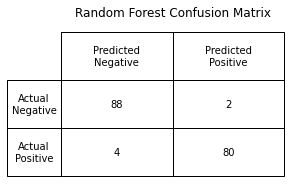

TN = 88, FP = 2, FN = 4, TP= 80

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        90
           1       0.98      0.95      0.96        84

    accuracy                           0.97       174
   macro avg       0.97      0.97      0.97       174
weighted avg       0.97      0.97      0.97       174



In [129]:
y_pred = cross_val_predict(random_forest, X_train_pca, y_train, cv=10)    
plot_confusion_matrix(y_pred, y_train, title='Random Forest Confusion Matrix')

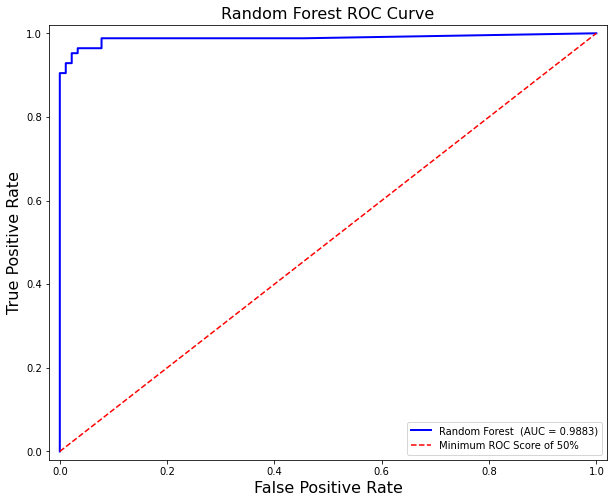

In [130]:
y_pred = cross_val_predict(random_forest, X_train_pca, y_train, cv=10, method='predict_proba')[:, 1]

log_fpr, log_tpr, log_thresold = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)

plot_roc_curve(log_fpr, log_tpr, auc, title='Random Forest')

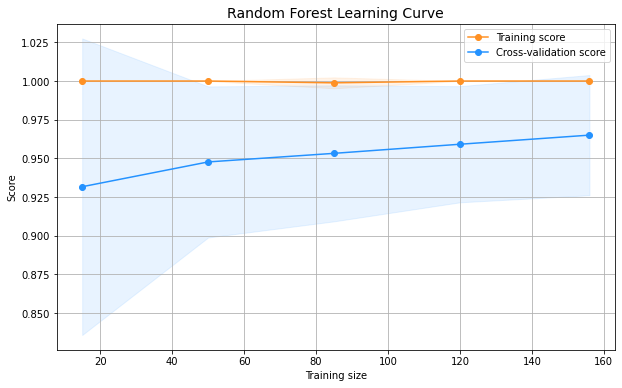

In [134]:
plot_learning_curve(random_forest, X=X_train_pca, y=y_train, cv=10, title="Random Forest Learning Curve")

0.9597701149425287


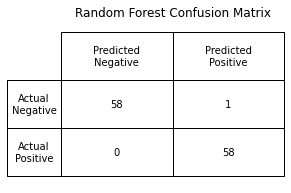

TN = 58, FP = 1, FN = 0, TP= 58

-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.98      1.00      0.99        58

    accuracy                           0.99       117
   macro avg       0.99      0.99      0.99       117
weighted avg       0.99      0.99      0.99       117



In [136]:
# Create Random Forest Classifier
random_forest = RandomForestClassifier(**clf.best_params_)
# Train the model on 70% of inizial dataset
random_forest.fit(X_train_pca, y_train)
# Evaluate the model on the test set
#accuracy = decision_tree.score(X_test_pca, y_test)
#print('Accuracy on Test set:', round(accuracy, 2))
y_pred = random_forest.predict(X_test_pca)    
plot_confusion_matrix(y_pred, y_test, title='Random Forest Confusion Matrix')

# 6. Comparing Results and Conclusions

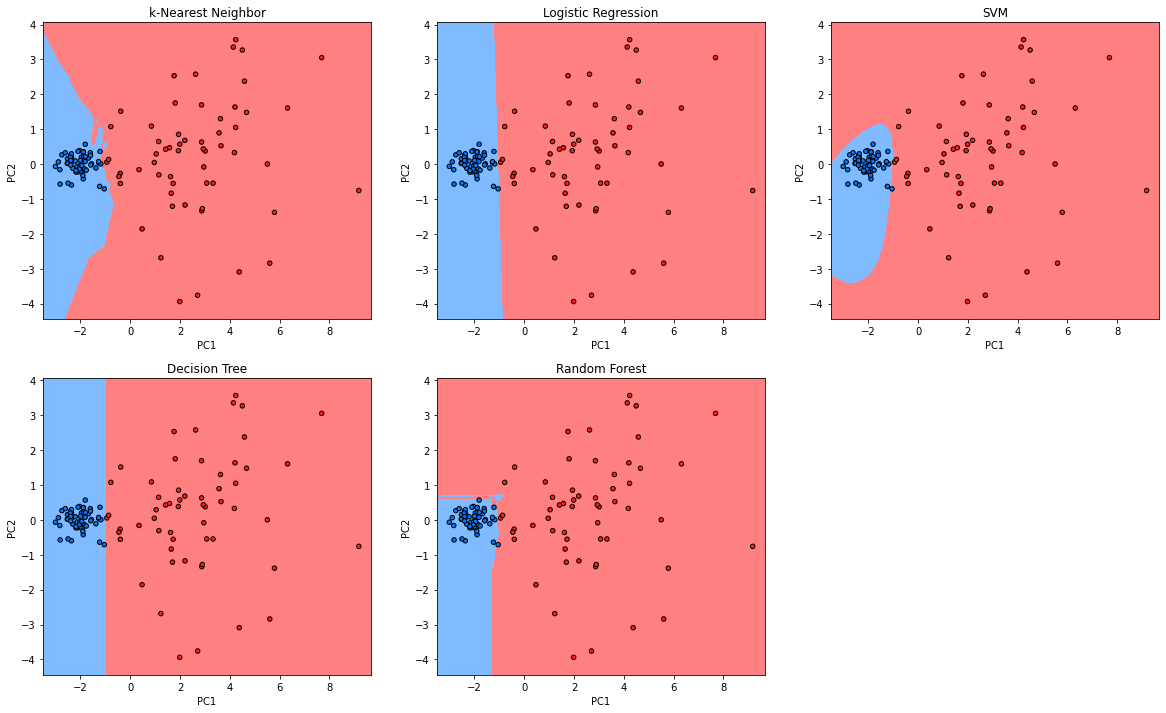

In [137]:
def plot_decision_boudaries(X, y, model, title, axes):
    h = .01  # step size in the mesh
    # Create color maps
    cmap_light = ListedColormap(['#80bbff', '#ff8080'])
    cmap_bold = ListedColormap(["#0077ff", "#ff1c1c"])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    axes.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    axes.scatter(X[:, 0], X[:, 1],
                c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    axes.set_xlim(xx.min(), xx.max())
    axes.set_ylim(yy.min(), yy.max())
    axes.set_xlabel('PC1')
    axes.set_ylabel('PC2')
    axes.set_title(title)
    

f, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,12))

plot_decision_boudaries(X_test_pca, y_test, knn, "k-Nearest Neighbor", axes[0][0])
plot_decision_boudaries(X_test_pca, y_test, log_reg, "Logistic Regression", axes[0][1])
plot_decision_boudaries(X_test_pca, y_test, svc, "SVM", axes[0][2])
plot_decision_boudaries(X_test_pca, y_test, decision_tree, "Decision Tree", axes[1][0])
plot_decision_boudaries(X_test_pca, y_test, random_forest, "Random Forest", axes[1][1])

axes[1][2].remove()
plt.show()


Comparing the results obtained, we can see that all classifiers analyzed allows to obtain very good performances with an accuracy greater than 0.95 in all cases, using 10-Fold Cross Validation as validation strategy. The best classifier is SVM with rbf kernel that, according to confusion matrix, allows to obtain only 4 False negative and 1 False positive with an overall accuracy of 0.97. Similar results are achieved by Random Forest with only 1 more False positive with respect to SVM. The worst classifier result as expected the Decision Tree with 6 False negative and 3 False positive. Despite the scope of improvement is small, the use of technique to improve Decision Tree performance (i.e. Random Forest) works fine. The other two classifiers also allow to achieve quite good results.  

Looking at the ROC Curves, we see that in all case the curve is very near to the top-left corner. This mean that all classifiers analyzed behave similar to ‘perfect’ classifier. The good performance can be also confirmed by looking at the AUC that is in all case higher than 0.9686.  

Considering the Learning Curves, in all cases the curve takes an horizontal trend in the final part of the plot. This means that the size of the dataset is enough and so providing more data should not lead to a further reduction of the error. The only exception seems to be the case of Random Forest where the cure is slightly growing, so in this case we could expect some improvements. Moreover, in all cases we can see that both training and validation curves are quite near, and this means that we are not overfitting our training data. 

After that the best configurations have been found, all classifiers have been trained on the whole train set (60% of the initial dataset) and finally tested on the test set (40%) using the splits that we randomly generated at the beginning of the analysis.  

From the resulting confusion matrices obtained we can see that almost all classifiers predict correctly the class for all samples and only SVM and Random Forest make a mistake on 1 case. However these results depends on the particular splits that we obtain during the random generation: performing multiple times these analysis with different splits we can obtain results that are slightly different but always extremely accurate.  

From the resulting decision boundaries for all classifiers it is particularly interesting to notice the non-linear decision boundary in the case of SVM due to the use of the rbf kernel. Logistic Regression instead generates a linear decision boundary while K-Nearest Neighbor and Random Forest produce more wiggled boundaries. Decision Tree substantially divides the area in only two region, so we have a vertical split.